# Prediction of house prices

In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
sns.set_palette("viridis")
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
pd.options.display.max_columns = None
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's check on the description of each feature:

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [3]:
# Shape of the data set
print('The archive has '+str(df.shape[1])+' columns and '+str(df.shape[0])+' rows')

The archive has 81 columns and 1460 rows


In [4]:
# Main statistical values
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Let's check on null values
pd.options.display.max_rows = None
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Null values treatment

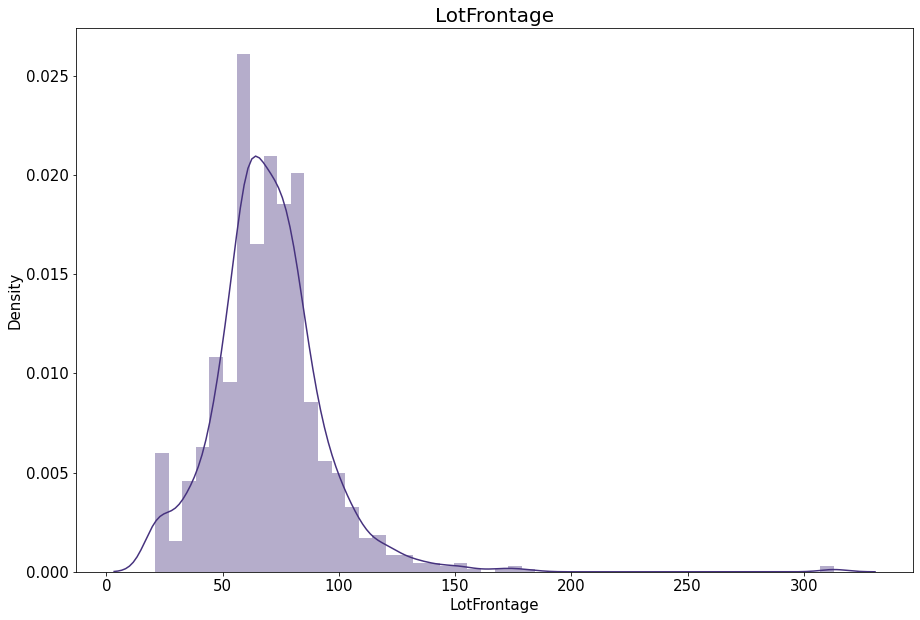

In [7]:
# LotFrontage
plt.figure(figsize=(15, 10))
sns.distplot(df['LotFrontage'])
plt.title('LotFrontage', fontsize = 20, fontweight = 10)
plt.xlabel('LotFrontage', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

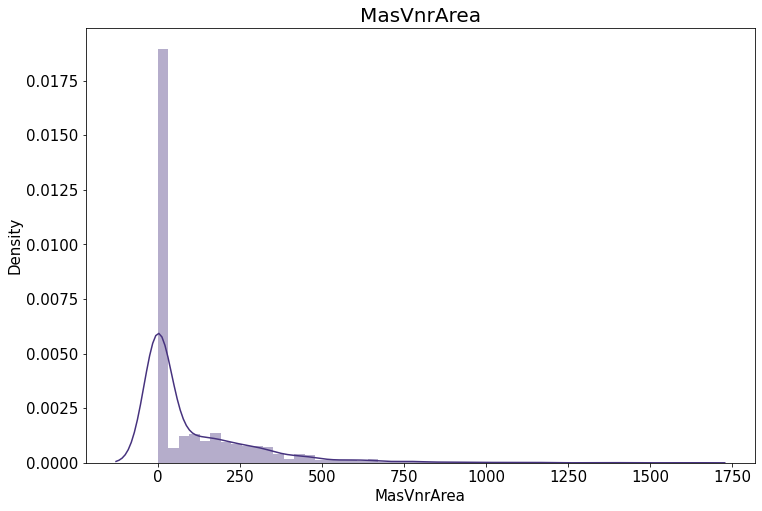

In [9]:
# MasVnrArea
plt.figure(figsize=(12, 8))
sns.distplot(df['MasVnrArea'])
plt.title('MasVnrArea', fontsize = 20, fontweight = 10)
plt.xlabel('MasVnrArea', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [10]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

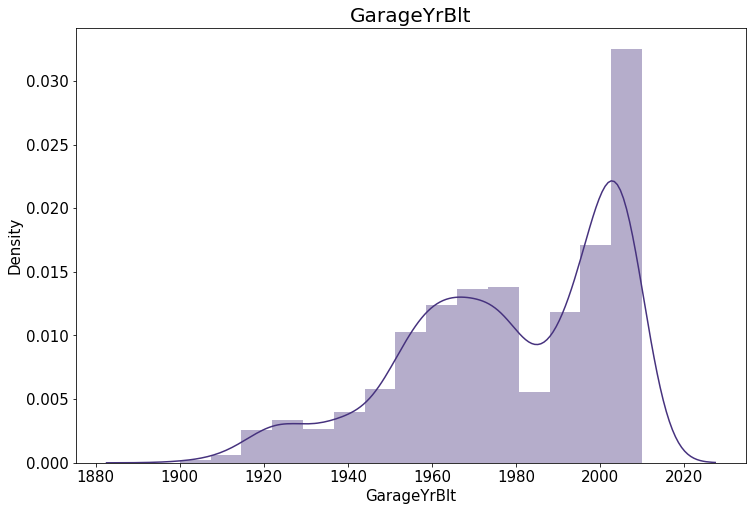

In [11]:
# GarageYrBlt
plt.figure(figsize=(12, 8))
sns.distplot(df['GarageYrBlt'])
plt.title('GarageYrBlt', fontsize = 20, fontweight = 10)
plt.xlabel('GarageYrBlt', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [12]:
# the missing values for Garage Building will be replaced by year of built
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

In [13]:
# For object type columns we will apply a similar exercise
print('Alley')
print(df.Alley.unique())
print('MasVnrType')
print(df.MasVnrType.unique())
print('BsmtQual')
print(df.BsmtQual.unique())
print('BsmtCond')
print(df.BsmtCond.unique())
print('BsmtExposure')
print(df.BsmtExposure.unique())
print('BsmtFinType1')
print(df.BsmtFinType1.unique())
print('BsmtFinType2')
print(df.BsmtFinType2.unique())
print('Electrical')
print(df.Electrical.unique())
print('FireplaceQu')
print(df.FireplaceQu.unique())
print('GarageType')
print(df.GarageType.unique())
print('GarageFinish')
print(df.GarageFinish.unique())
print('GarageQual')
print(df.GarageQual.unique())
print('GarageCond')
print(df.GarageCond.unique())
print('PoolQC')
print(df.GarageCond.unique())
print('Fence')
print(df.GarageCond.unique())
print('MiscFeature')
print(df.GarageCond.unique())

Alley
[nan 'Grvl' 'Pave']
MasVnrType
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish
['RFn' 'Unf' 'Fin' nan]
GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Fence
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
MiscFeature
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [14]:
df['Alley'] = df['Alley'].fillna("NA") # No alley access
df['FireplaceQu'] = df['FireplaceQu'].fillna("NA") # No fireplace
df['PoolQC'] = df['PoolQC'].fillna("NA") # No pool
df['Fence'] = df['Fence'].fillna("NA") # No fence
df['MiscFeature'] = df['MiscFeature'].fillna("NA") # No miscellaneous features

In [15]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0]) 
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0]) 
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0]) 
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0]) 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0]) 
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0]) 

We can see that for several qualities features the punctuation goes from a fixed scale, lets see which are those variables:

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
       
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Let's set a scale for these variables: 

    NA = 0
    Po = 1
    Fa = 2
    TA = 3
    Gd = 4
    Ex = 5

In [16]:
# Let's replace!
df.ExterQual = df.ExterQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.ExterCond = df.ExterCond.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.BsmtQual = df.BsmtQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.BsmtCond = df.BsmtCond.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.HeatingQC = df.HeatingQC.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.KitchenQual = df.KitchenQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.FireplaceQu = df.FireplaceQu.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.GarageQual = df.GarageQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.GarageCond = df.GarageCond.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
df.PoolQC = df.PoolQC.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,NA,NA,0,12,2008,WD,Normal,250000


In [17]:
# Let's double check that we dont have null values
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

## Exploratory Data Analysis

Let's extract some insights form the data

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,NA,NA,0,12,2008,WD,Normal,250000


Let's see first the distribution of houses prices

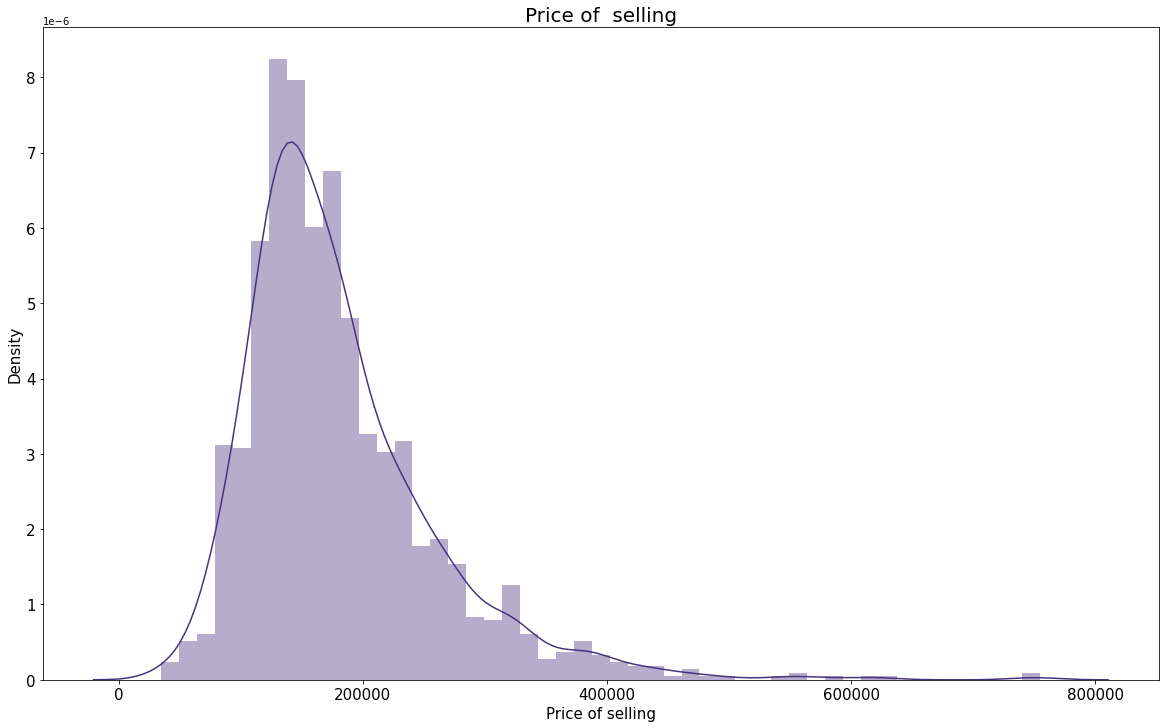

In [19]:
plt.figure(figsize=(20, 12))
sns.distplot(df['SalePrice'])
plt.title('Price of  selling', fontsize = 20, fontweight = 10)
plt.xlabel('Price of selling', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Most of the houses are sold in a range between 100k and 225k. Let's take a look into the mean, median and standard deviation of the values.

In [20]:
print('Mean')
print(df.SalePrice.mean().round(3))
print('')
print('Median')
print(df.SalePrice.median().round(3))
print('')
print('Standard deviation')
print(df.SalePrice.std().round(3))

Mean
180921.196

Median
163000.0

Standard deviation
79442.503


One of the variables that we might thing it has a strong relationship with price would be the area of the property. 

### Type of dwelling involved in the sale

In [21]:
dwelling_price = df.groupby('MSSubClass').SalePrice.mean().to_frame(name='Price').reset_index()
dwelling_price = dwelling_price.replace(
    [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190], 
    ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', 
     '1-1/2 STORY - UNFINISHED ALL AGES', '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', 
     '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER',
     'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 
     '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER', 
     'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES'])
dwelling_price = dwelling_price.sort_values(by=['Price'], ascending=False).reset_index(drop=True)

dwelling_price

,MSSubClass,Price
0,2-STORY 1946 & NEWER,239948.501672
1,1-STORY PUD (Planned Unit Development) - 1946 ...,200779.080460
2,2-1/2 STORY ALL AGES,192437.500000
3,1-STORY 1946 & NEWER ALL STYLES,185224.811567
4,SPLIT OR MULTI-LEVEL,169736.551724
5,2-STORY 1945 & OLDER,166772.416667
6,1-STORY W/FINISHED ATTIC ALL AGES,156125.000000
7,SPLIT FOYER,147810.000000
8,1-1/2 STORY FINISHED ALL AGES,143302.972222
9,2-STORY PUD - 1946 & NEWER,138647.380952


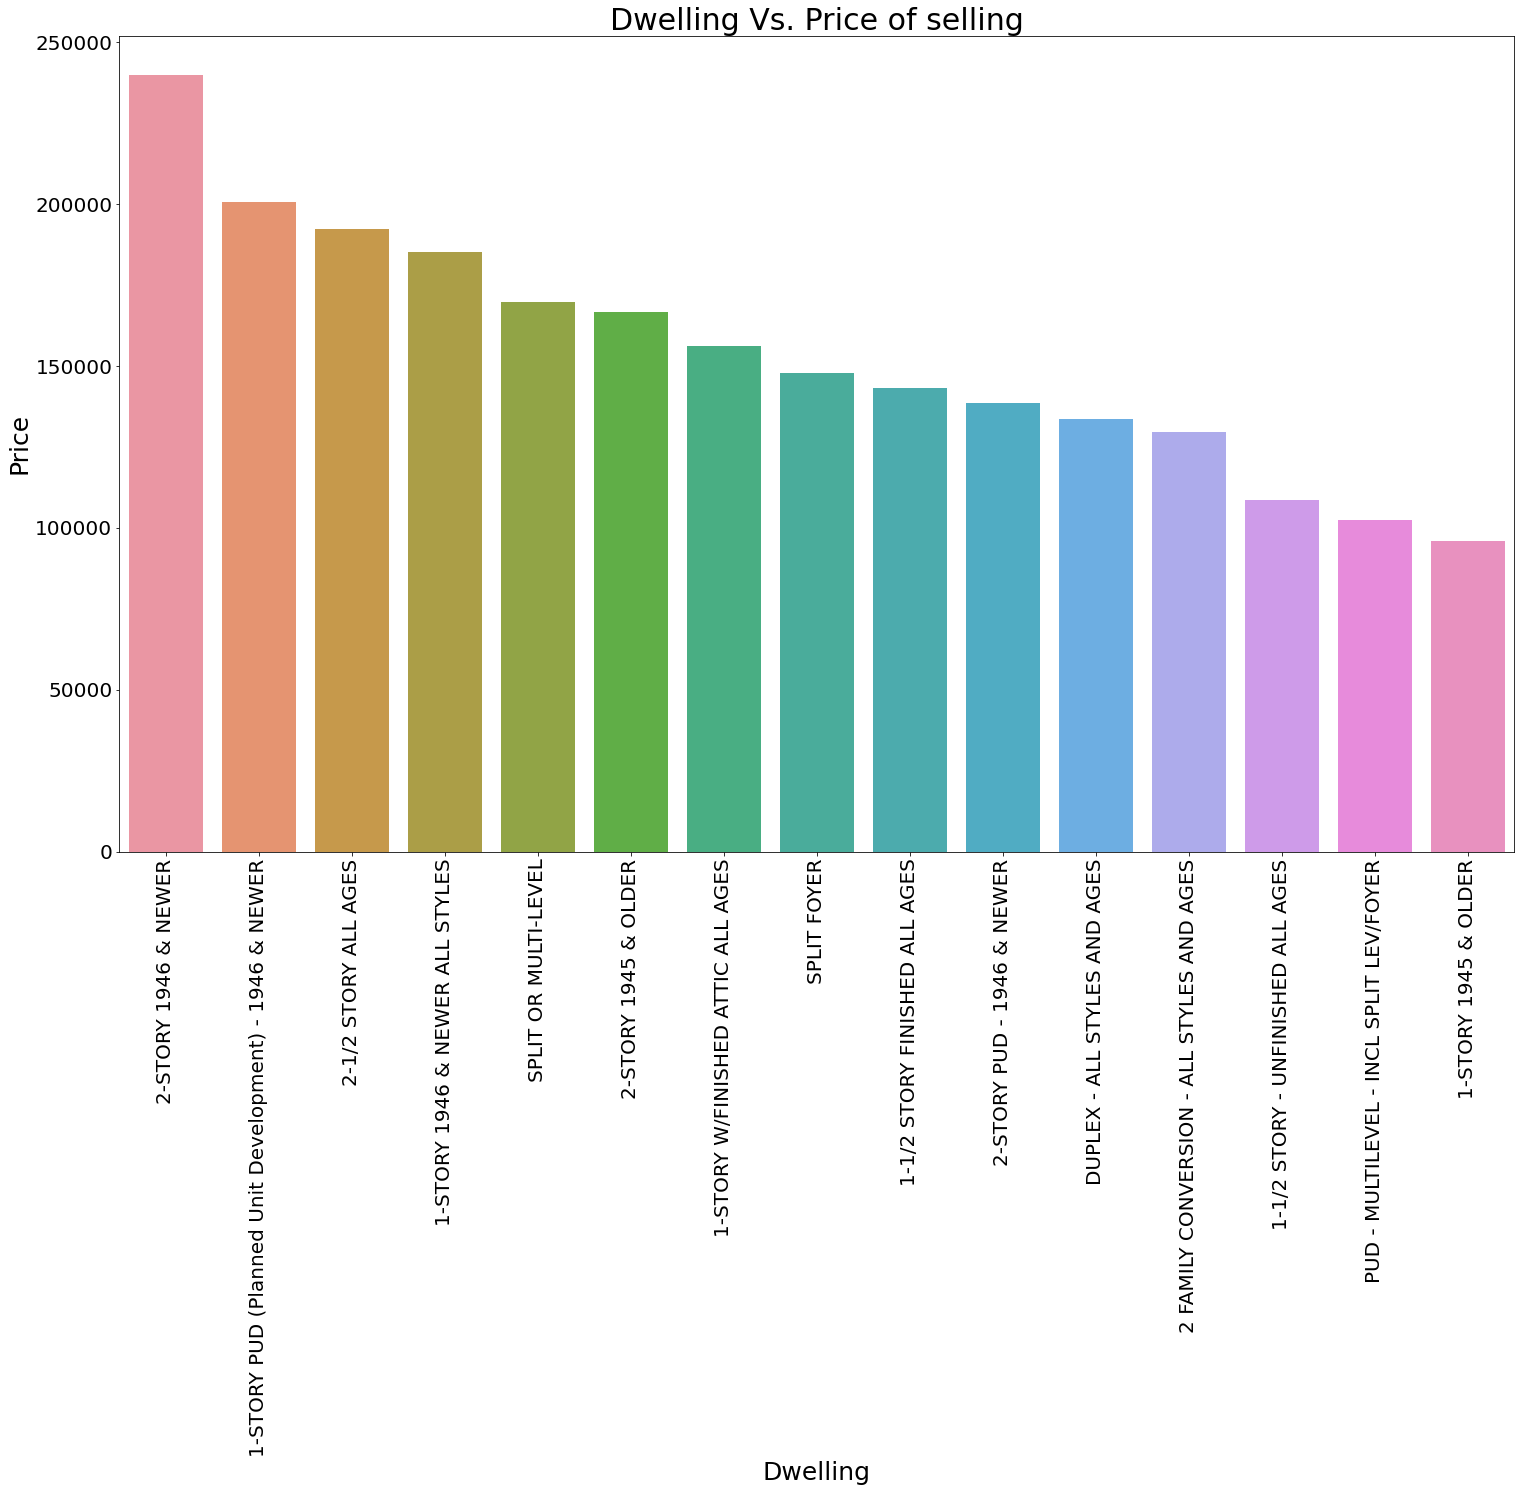

In [22]:
plt.figure(figsize=(25, 15))
sns.barplot(x=dwelling_price['MSSubClass'], y=dwelling_price['Price'])
plt.title("Dwelling Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Dwelling", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation='90')
plt.show()

### General zoning classification of the sale

In [23]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [24]:
zoning_price = df.groupby('MSZoning').SalePrice.mean().to_frame(name='Price').reset_index()
zoning_price = zoning_price.replace(
    ['C (all)', 'FV', 'RH', 'RL', 'RM'], 
    ['All', 'Floating Village Residential', 
     'Residential High Density', 'Residential Low Density', 
     'Residential Medium Density'])
zoning_price = zoning_price.sort_values(by=['Price'], ascending=False).reset_index(drop=True)

zoning_price

,MSZoning,Price
0,Floating Village Residential,214014.061538
1,Residential Low Density,191004.994787
2,Residential High Density,131558.375000
3,Residential Medium Density,126316.830275
4,All,74528.000000


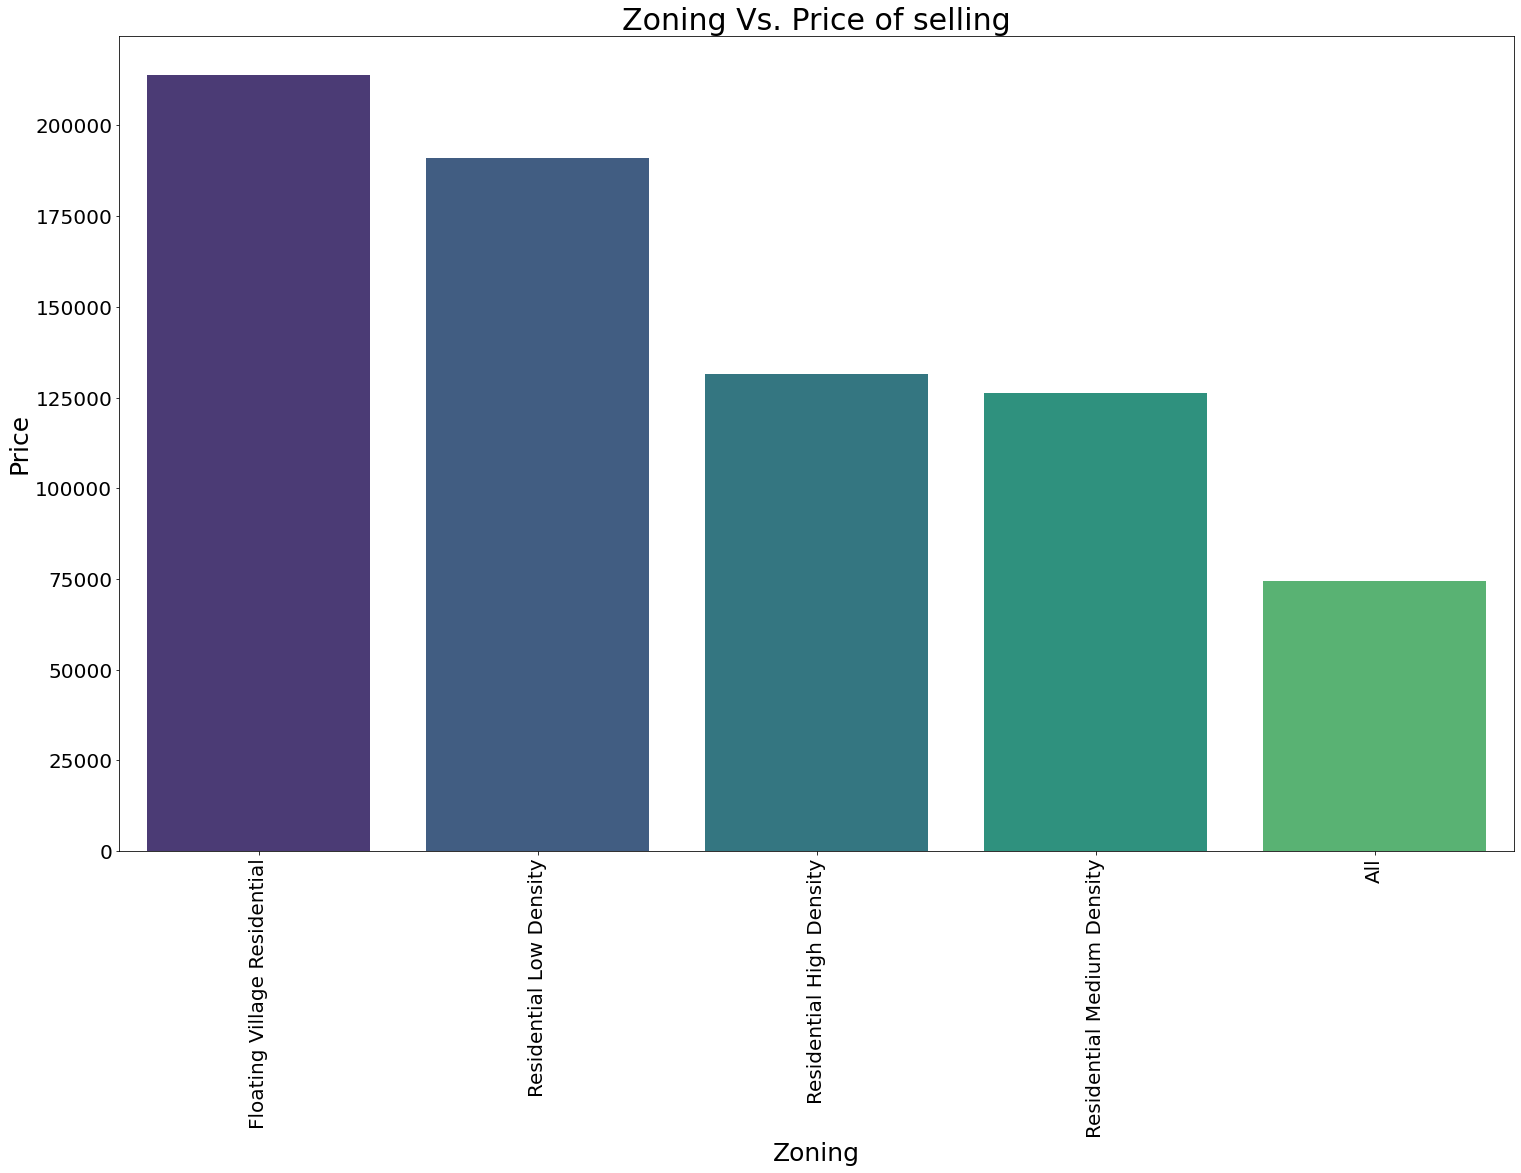

In [25]:
plt.figure(figsize=(25, 15))
sns.barplot(x=zoning_price['MSZoning'], y=zoning_price['Price'])
plt.title("Zoning Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Zoning", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation='90')
plt.show()

### Terrain conditions

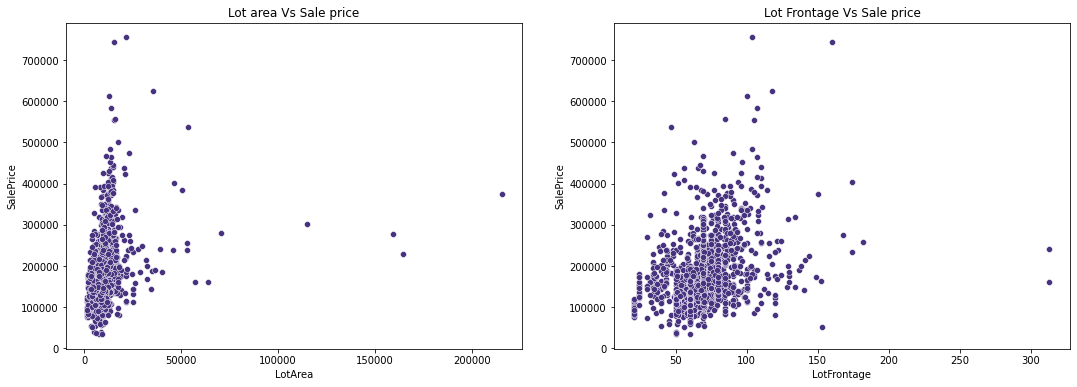

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.scatterplot(x=df['LotArea'], y=df['SalePrice'], ax=axs[0])
axs[0].set_title('Lot area Vs Sale price')
sns.scatterplot(x=df['LotFrontage'], y=df['SalePrice'], ax=axs[1])
axs[1].set_title('Lot Frontage Vs Sale price')
plt.show()

It becomes obvious that there is no linear relationship between this two variables and the price of the selling, specially on the size of the lot. This might be an indication that independently of these variables, there are others related to the area and dimensions that would have a bigger impact on the price. Let's evaluate the shape, flatness and slope of the property versus the selling.

In [27]:
# Lot shape
shape_price = df.groupby('LotShape').SalePrice.mean().to_frame(name='Price').reset_index()
shape_price = shape_price.replace(['Reg', 'IR1', 'IR2', 'IR3'], ['Regular', 'Slightly irregular', 'Moderately Irregular', 'Irregular'])
shape_price

,LotShape,Price
0,Slightly irregular,206101.665289
1,Moderately Irregular,239833.365854
2,Irregular,216036.500000
3,Regular,164754.818378


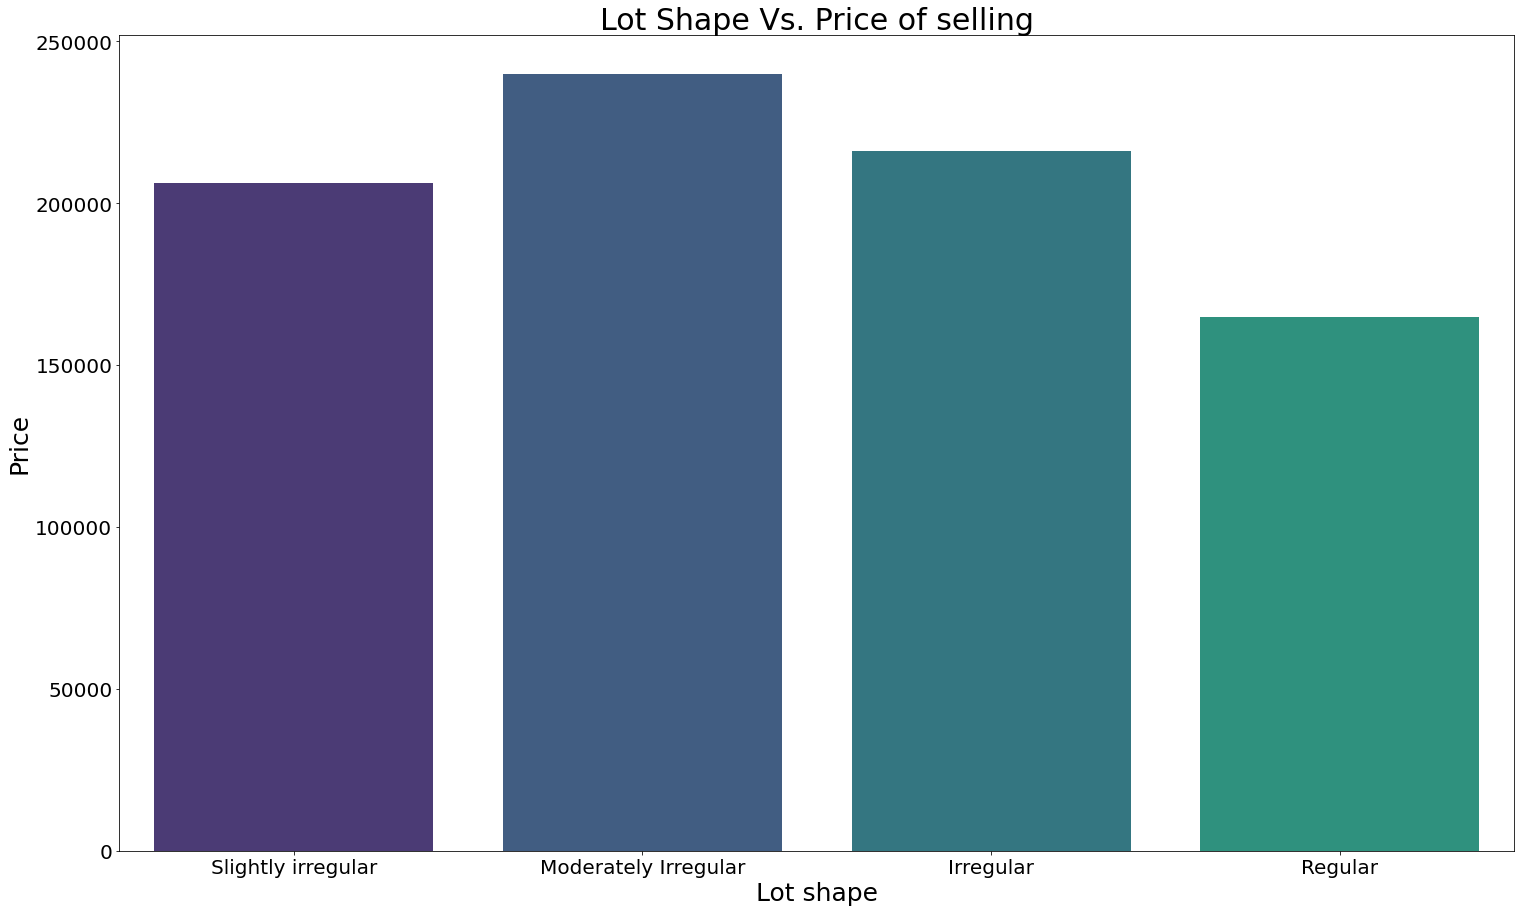

In [28]:
plt.figure(figsize=(25, 15))
sns.barplot(x=shape_price['LotShape'], y=shape_price['Price'])
plt.title("Lot Shape Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Lot shape", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

In [29]:
# Flatness
contour_price = df.groupby('LandContour').SalePrice.mean().to_frame(name='Price').reset_index()
contour_price = contour_price.replace(['Lvl', 'Bnk', 'HLS', 'Low'], ['Near Flat/Level', 'Banked', 'Hillside', 'Depression'])
contour_price

,LandContour,Price
0,Banked,143104.079365
1,Hillside,231533.940000
2,Depression,203661.111111
3,Near Flat/Level,180183.746758


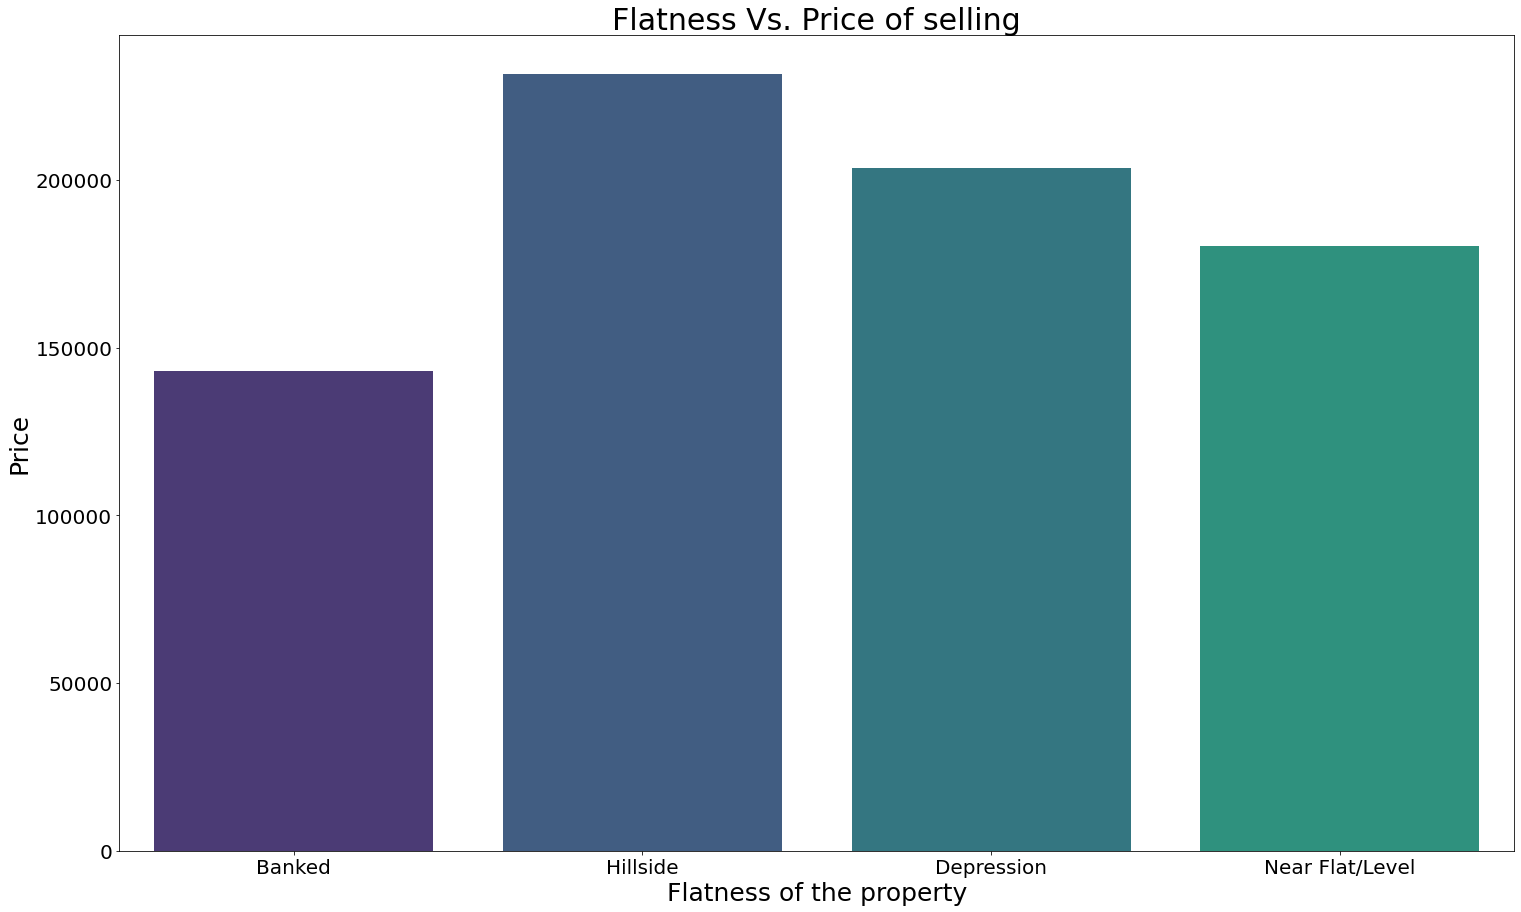

In [30]:
plt.figure(figsize=(25, 15))
sns.barplot(x=contour_price['LandContour'], y=contour_price['Price'])
plt.title("Flatness Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Flatness of the property", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

In [31]:
# Slopeness
slope_price = df.groupby('LandSlope').SalePrice.mean().to_frame(name='Price').reset_index()
slope_price = slope_price.replace(['Gtl', 'Mod', 'Sev'], ['Gentle slope', 'Moderate slope', 'Severe slope'])
slope_price

,LandSlope,Price
0,Gentle slope,179956.799566
1,Moderate slope,196734.138462
2,Severe slope,204379.230769


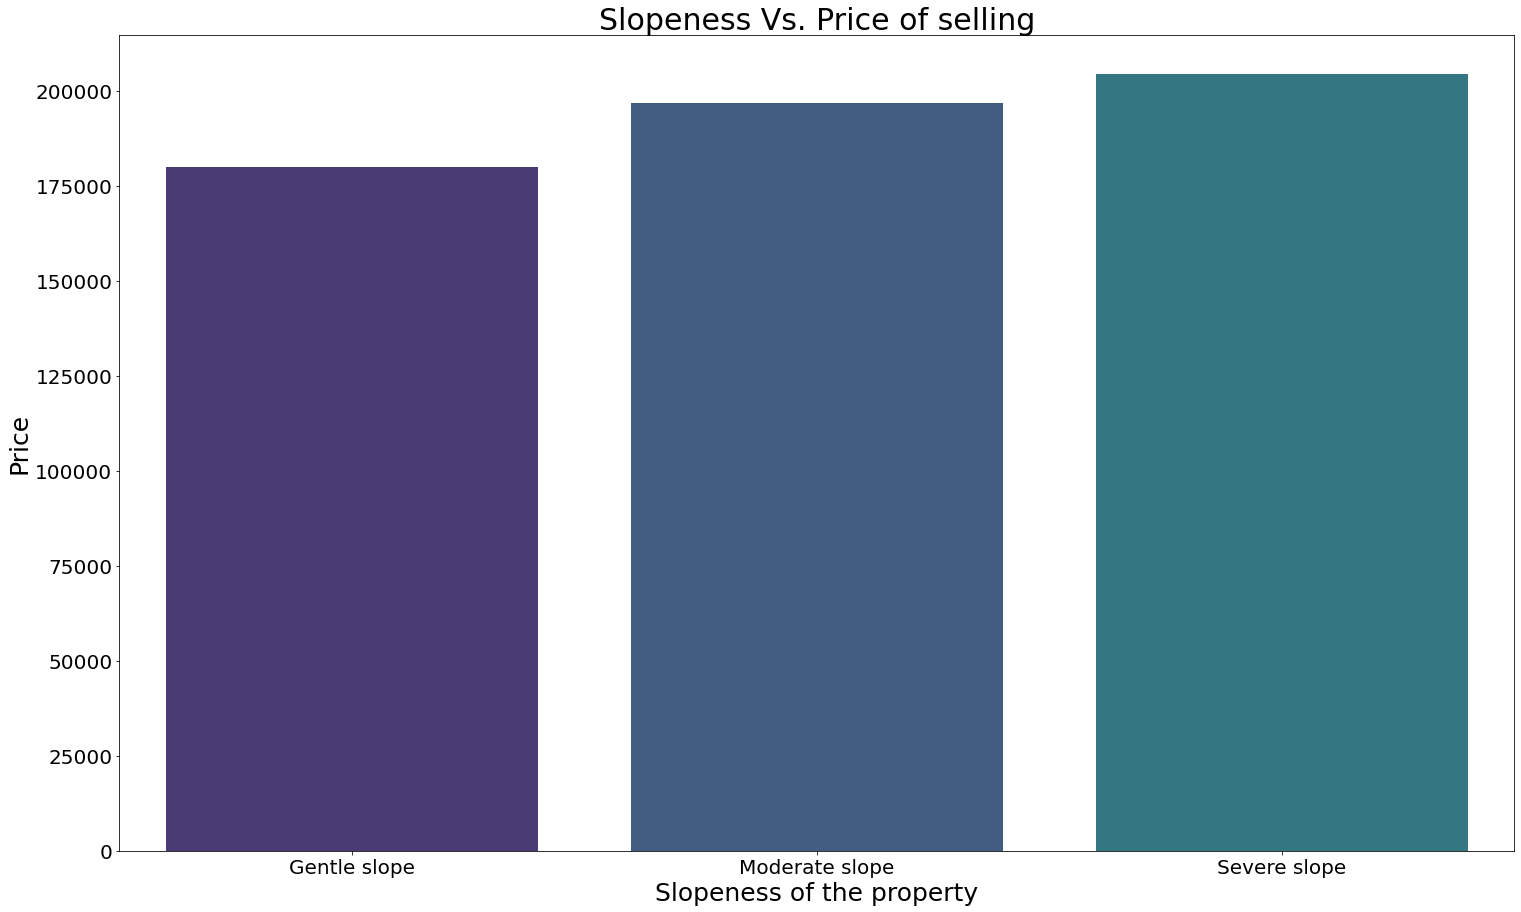

In [32]:
plt.figure(figsize=(25, 15))
sns.barplot(x=slope_price['LandSlope'], y=slope_price['Price'])
plt.title("Slopeness Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Slopeness of the property", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

### Accesses

Lets evaluate the access to the property, first the street and second the alley (if applies)

In [33]:
# Street
street_price = df.groupby('Street').SalePrice.mean().to_frame(name='Price').reset_index()
street_price = street_price.replace(['Grvl', 'Pave'], ['Gravel', 'Pavement'])
street_price

,Street,Price
0,Gravel,130190.500000
1,Pavement,181130.538514


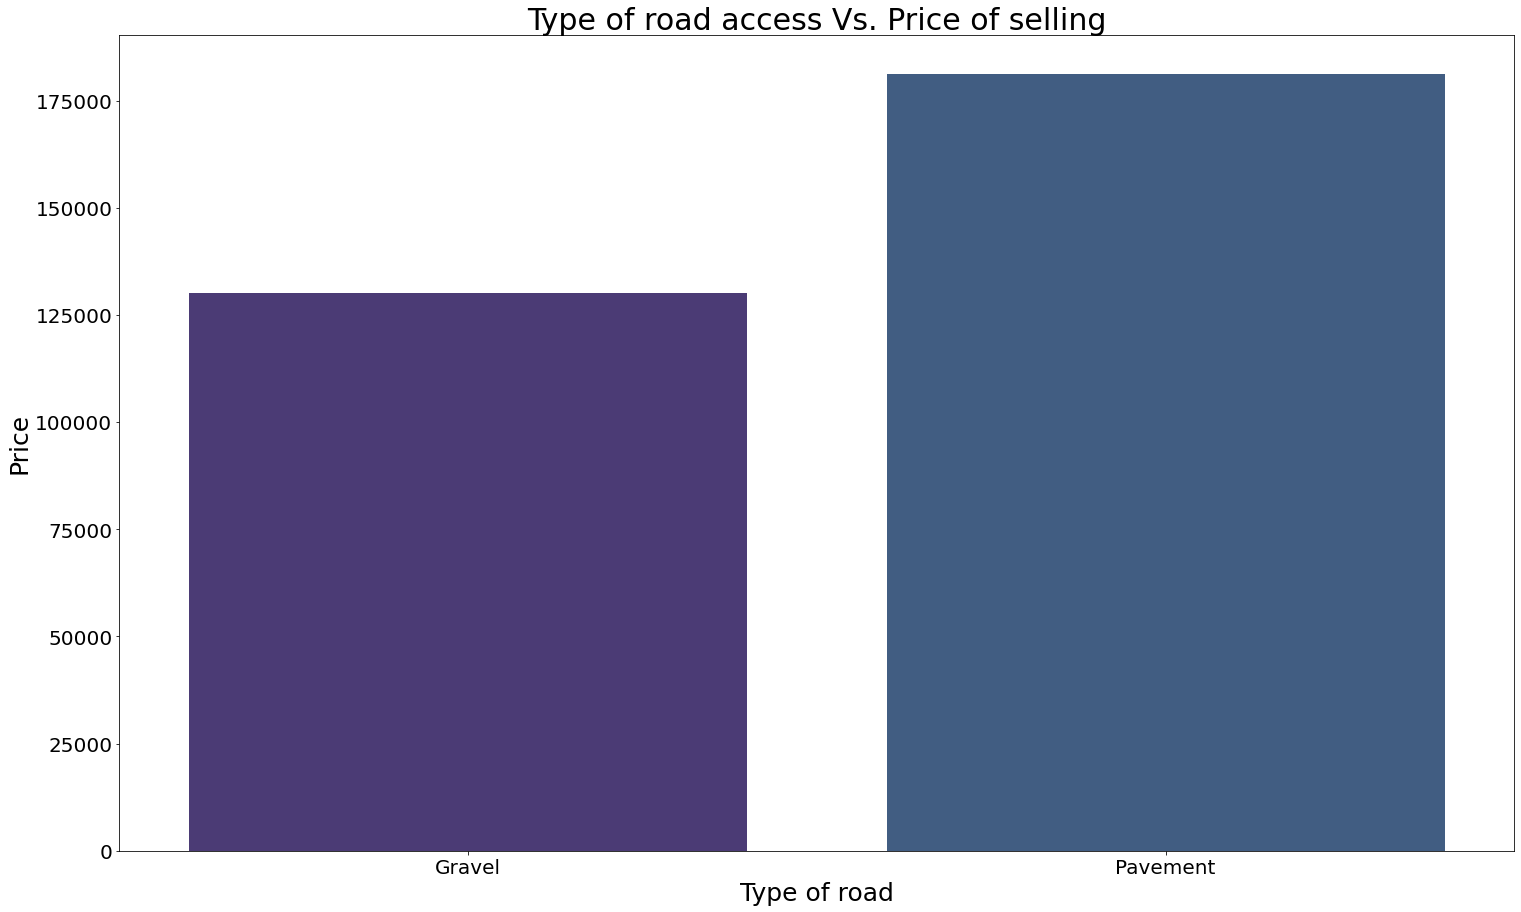

In [34]:
plt.figure(figsize=(25, 15))
sns.barplot(x=street_price['Street'], y=street_price['Price'])
plt.title("Type of road access Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Type of road", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

In [35]:
# Alley access
alley_price = df.groupby('Alley').SalePrice.mean().to_frame(name='Price').reset_index()
alley_price = alley_price.replace(['Grvl', 'Pave', 'NA'], ['Gravel', 'Pavement', 'No alley access'])
alley_price

,Alley,Price
0,Gravel,122219.080000
1,No alley access,183452.131483
2,Pavement,168000.585366


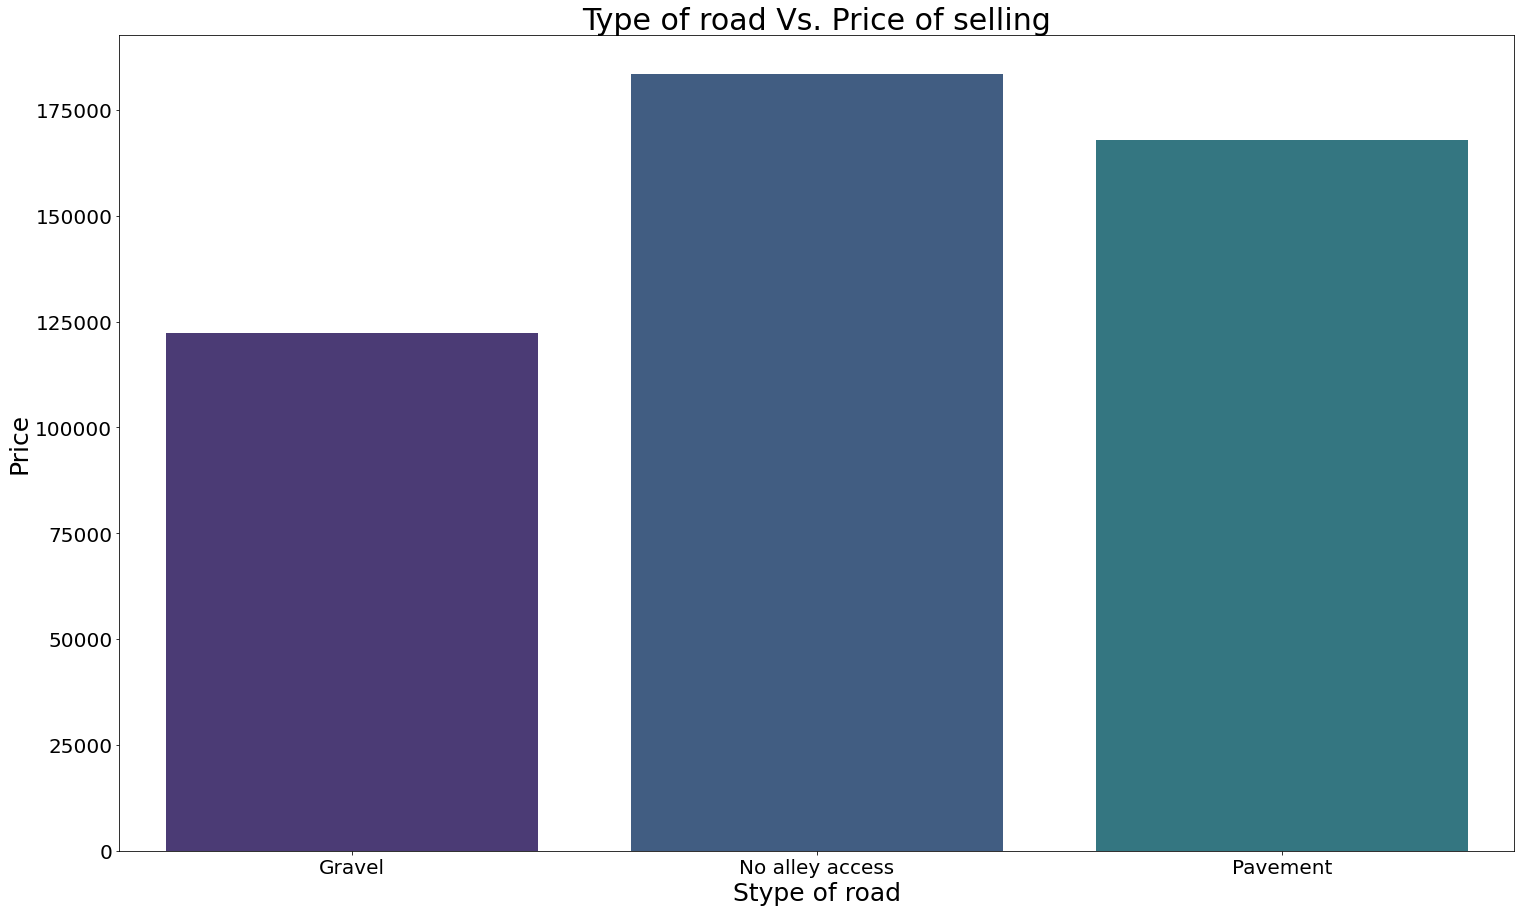

In [36]:
plt.figure(figsize=(25, 15))
sns.barplot(x=alley_price['Alley'], y=alley_price['Price'])
plt.title("Type of road Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Stype of road", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

It seems that, generally, pavement access is more valuable than gravel. Another important feature could be the roads, streets and arteries that are located near the property:

  * Artery: Adjacent to arterial street
  * Feedr: Adjacent to feeder street	
  * Norm: Normal	
  * RRNn: Within 200' of North-South Railroad
  * RRAn: Adjacent to North-South Railroad
  * PosN: Near positive off-site feature--park, greenbelt, etc.
  * PosA: Adjacent to postive off-site feature
  * RRNe: Within 200' of East-West Railroad
  * RRAe: Adjacent to East-West Railroad

In [37]:
# Conditions
condition1_price = df.groupby('Condition1').SalePrice.mean().to_frame(name='Price').reset_index()
condition1_price

,Condition1,Price
0,Artery,135091.666667
1,Feedr,142475.481481
2,Norm,184495.492063
3,PosA,225875.000000
4,PosN,215184.210526
5,RRAe,138400.000000
6,RRAn,184396.615385
7,RRNe,190750.000000
8,RRNn,212400.000000


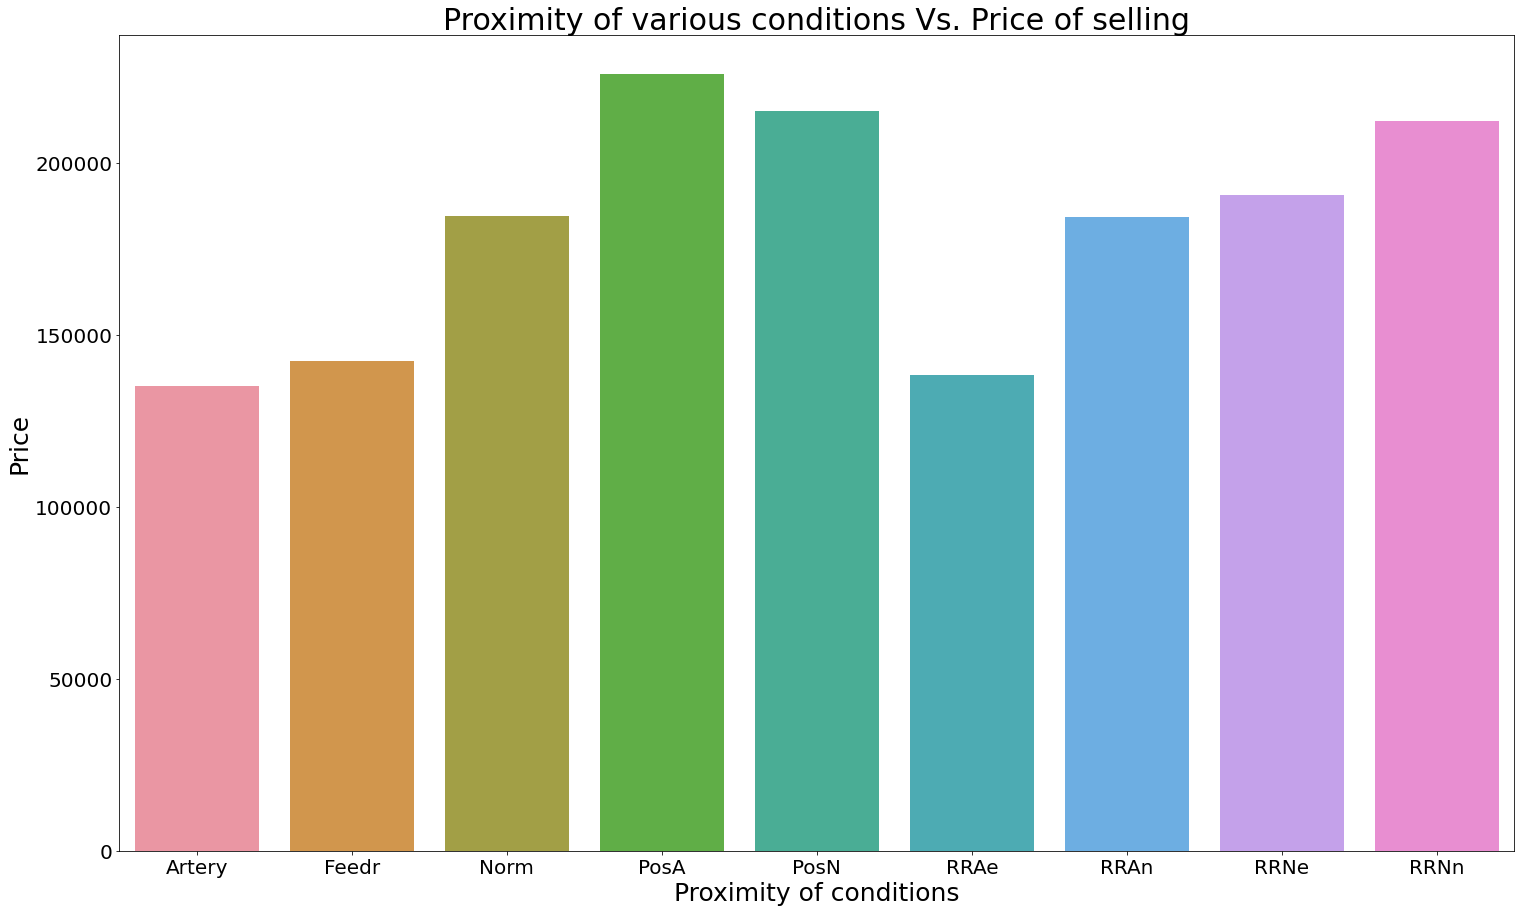

In [38]:
plt.figure(figsize=(25, 15))
sns.barplot(x=condition1_price['Condition1'], y=condition1_price['Price'])
plt.title("Proximity of various conditions Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Proximity of conditions", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

### Years of construction and remodel

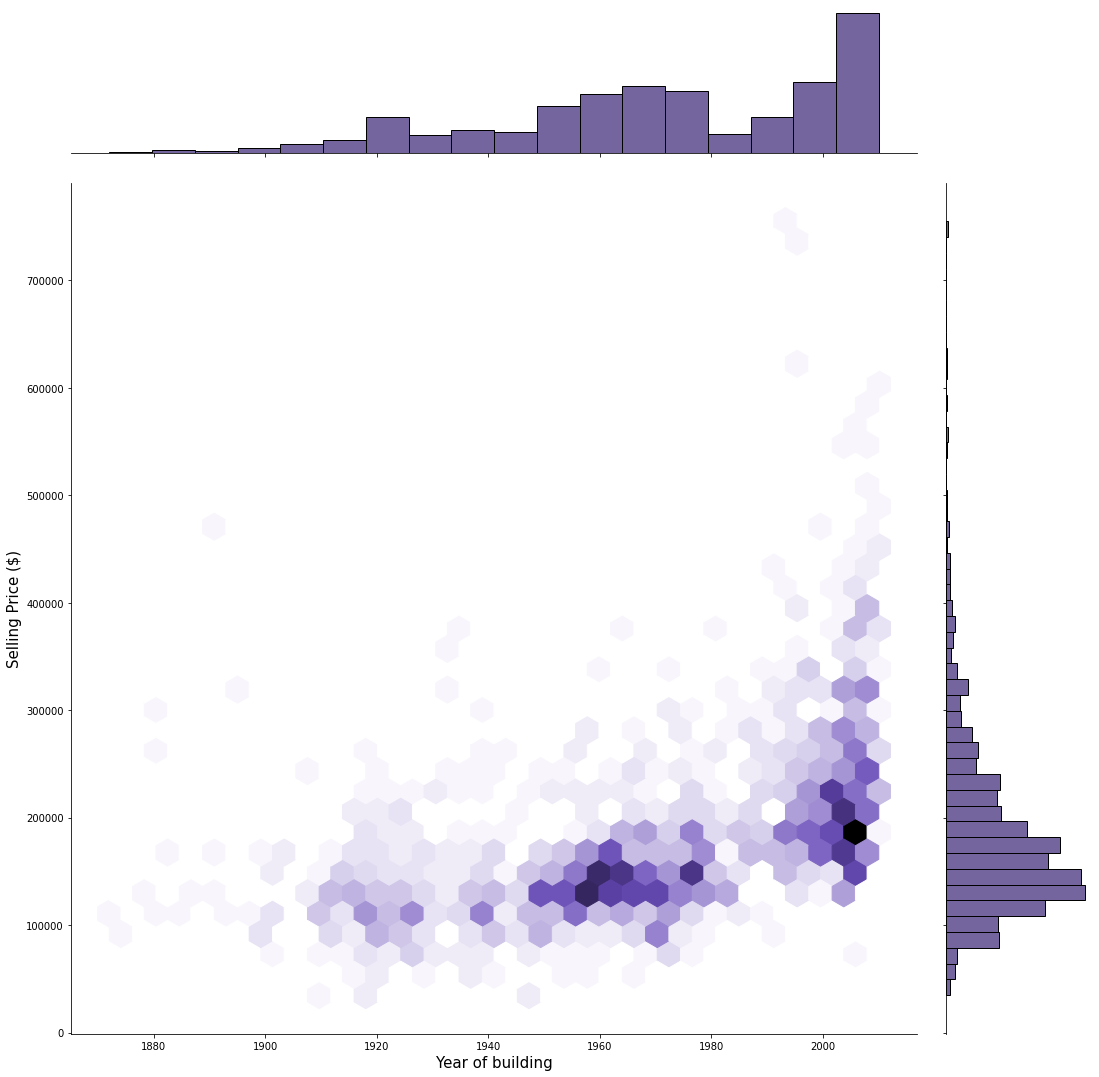

In [39]:
# Construction
sns.jointplot(x=df['YearBuilt'], y=df['SalePrice'], kind = 'hex', height = 15)
plt.xlabel('Year of building', fontsize = 15)
plt.ylabel('Selling Price ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

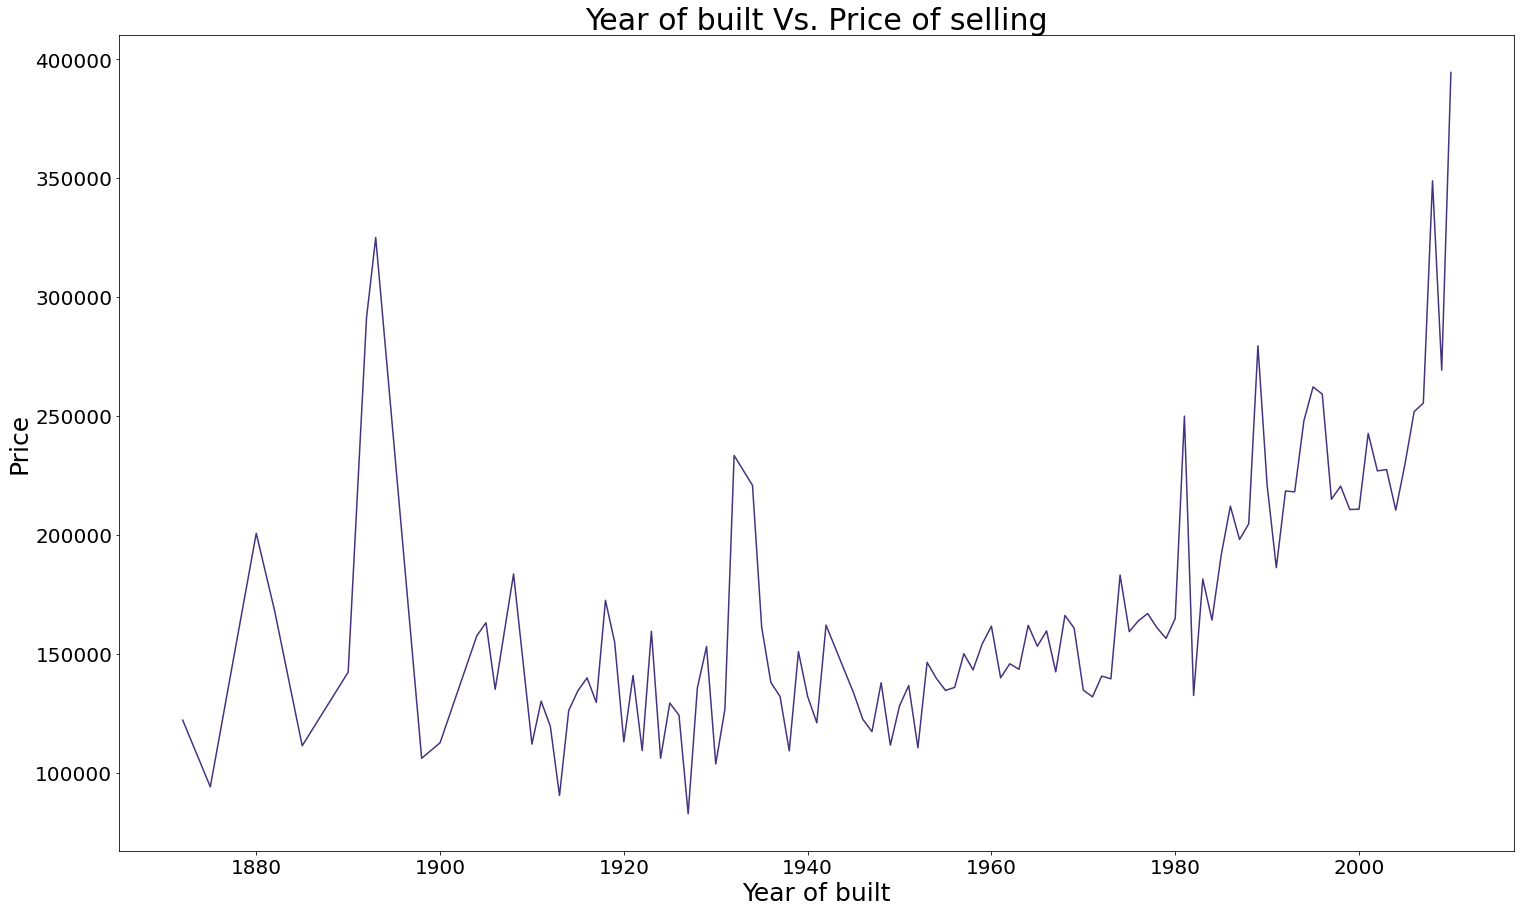

In [40]:
YearBuilt_price = df.groupby('YearBuilt').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.lineplot(x=YearBuilt_price['YearBuilt'], y=YearBuilt_price['Price'])
plt.title("Year of built Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Year of built", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

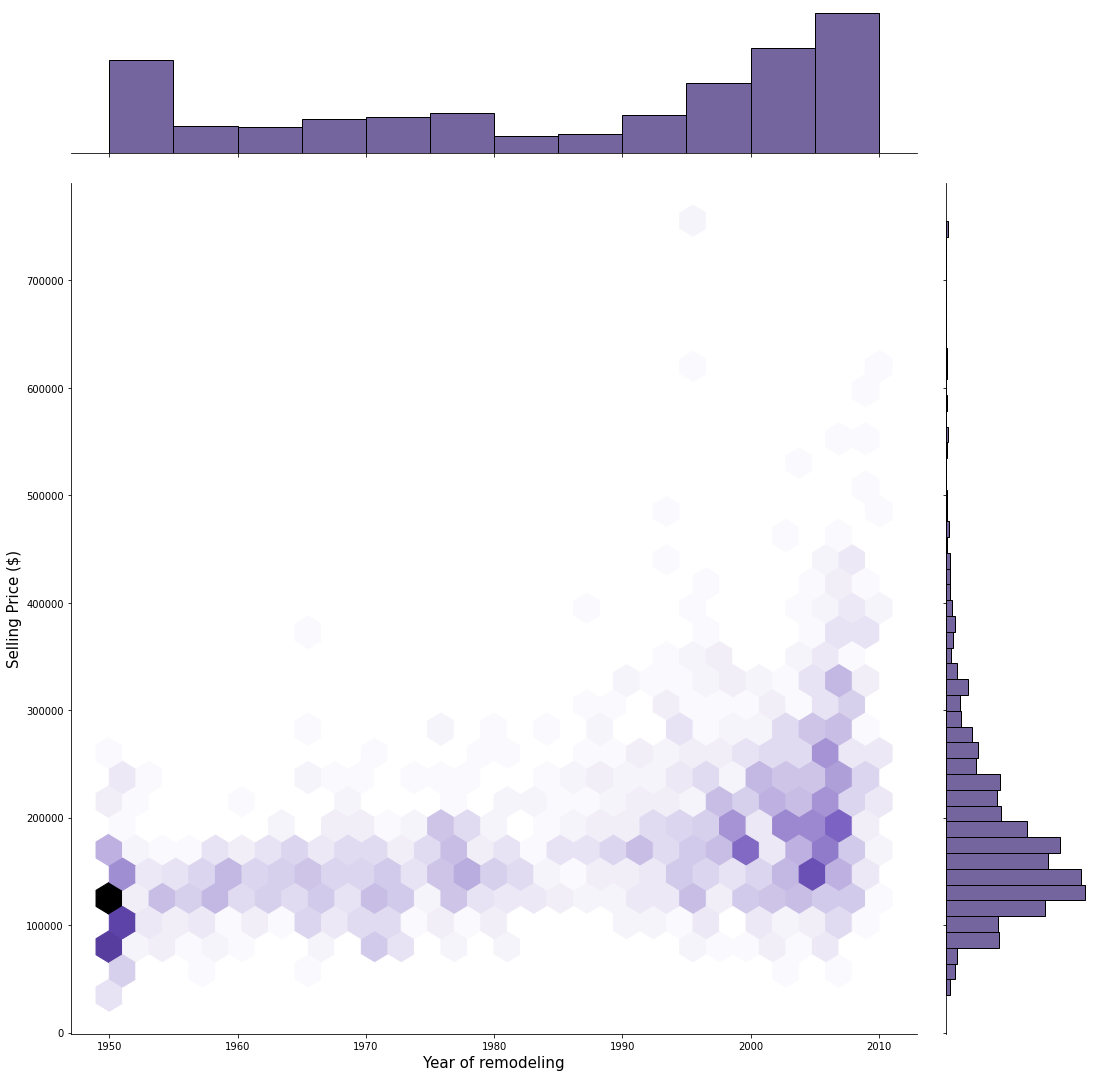

In [41]:
# Construction
sns.jointplot(x=df['YearRemodAdd'], y=df['SalePrice'], kind = 'hex', height = 15)
plt.xlabel('Year of remodeling', fontsize = 15)
plt.ylabel('Selling Price ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

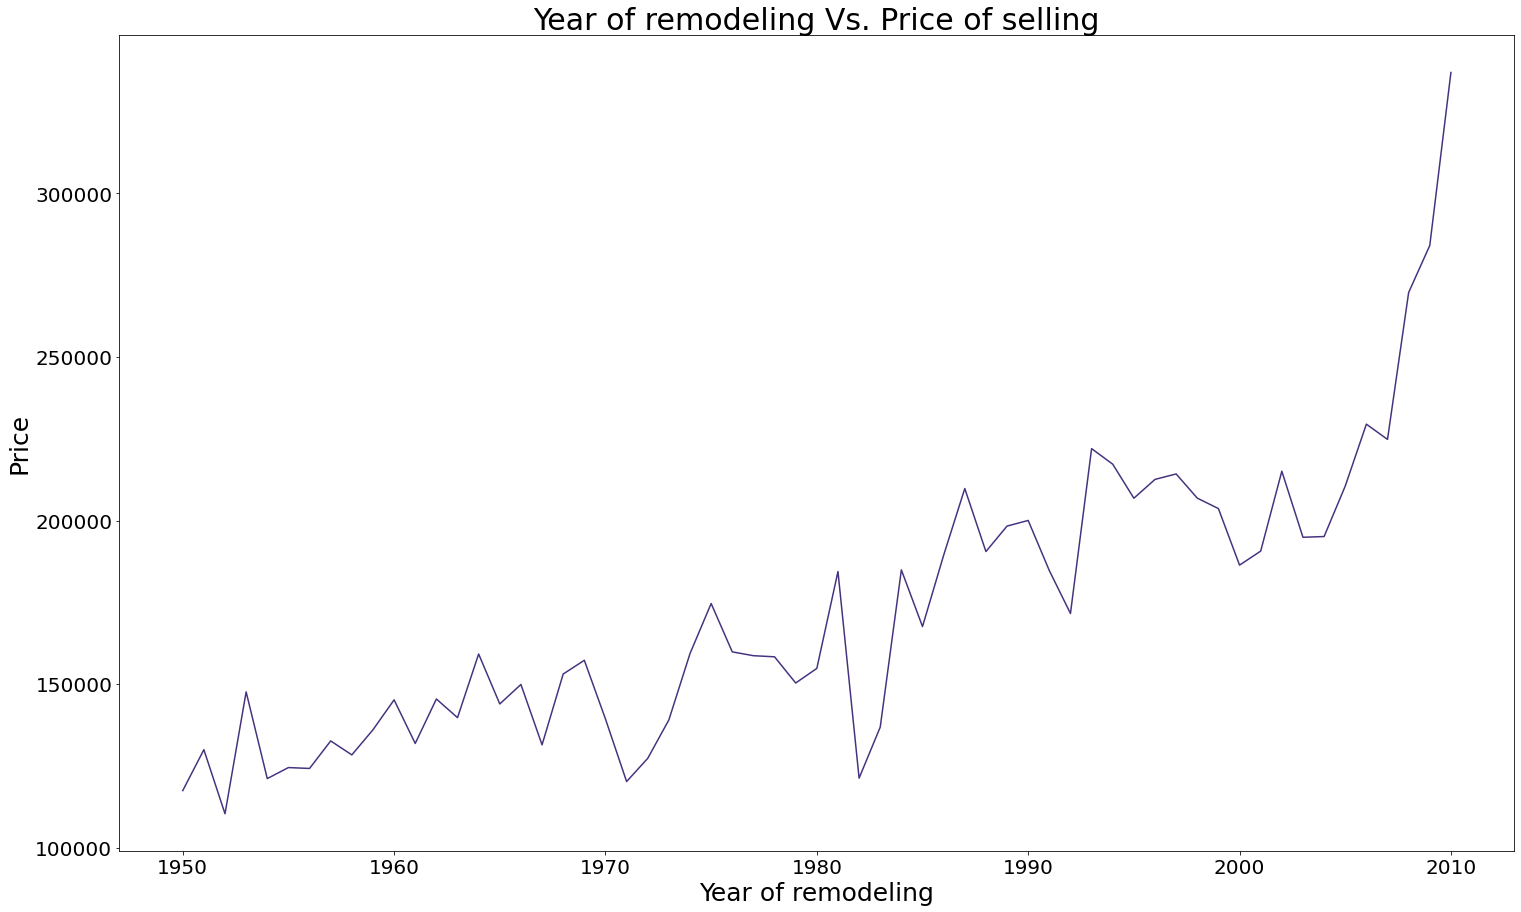

In [42]:
YearRemodAdd_price = df.groupby('YearRemodAdd').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.lineplot(x=YearRemodAdd_price['YearRemodAdd'], y=YearRemodAdd_price['Price'])
plt.title("Year of remodeling Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Year of remodeling", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

The principal insight that we can extract from these variables is that the newer a house (or its remodeling), its selling price is greater. We can se some spikes in the year of built graph for houses around the lats of the 1800 century, but this could be related to fewer samples from this era an particular cases with high selling price.

### Conditions & Quality

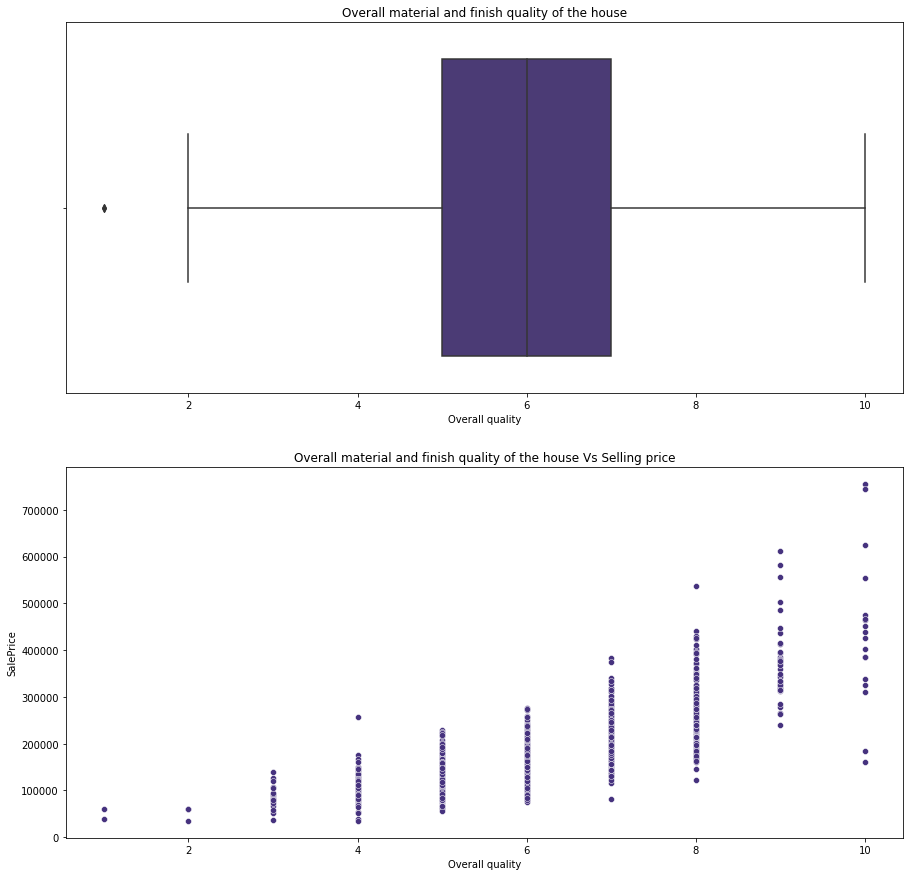

In [43]:
# Overall material and finish quality
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
sns.boxplot(x=df['OverallQual'], ax=axs[0])
axs[0].set(title = 'Overall material and finish quality of the house', xlabel='Overall quality')
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'], ax=axs[1])
axs[1].set(title = 'Overall material and finish quality of the house Vs Selling price', xlabel='Overall quality')
plt.show()

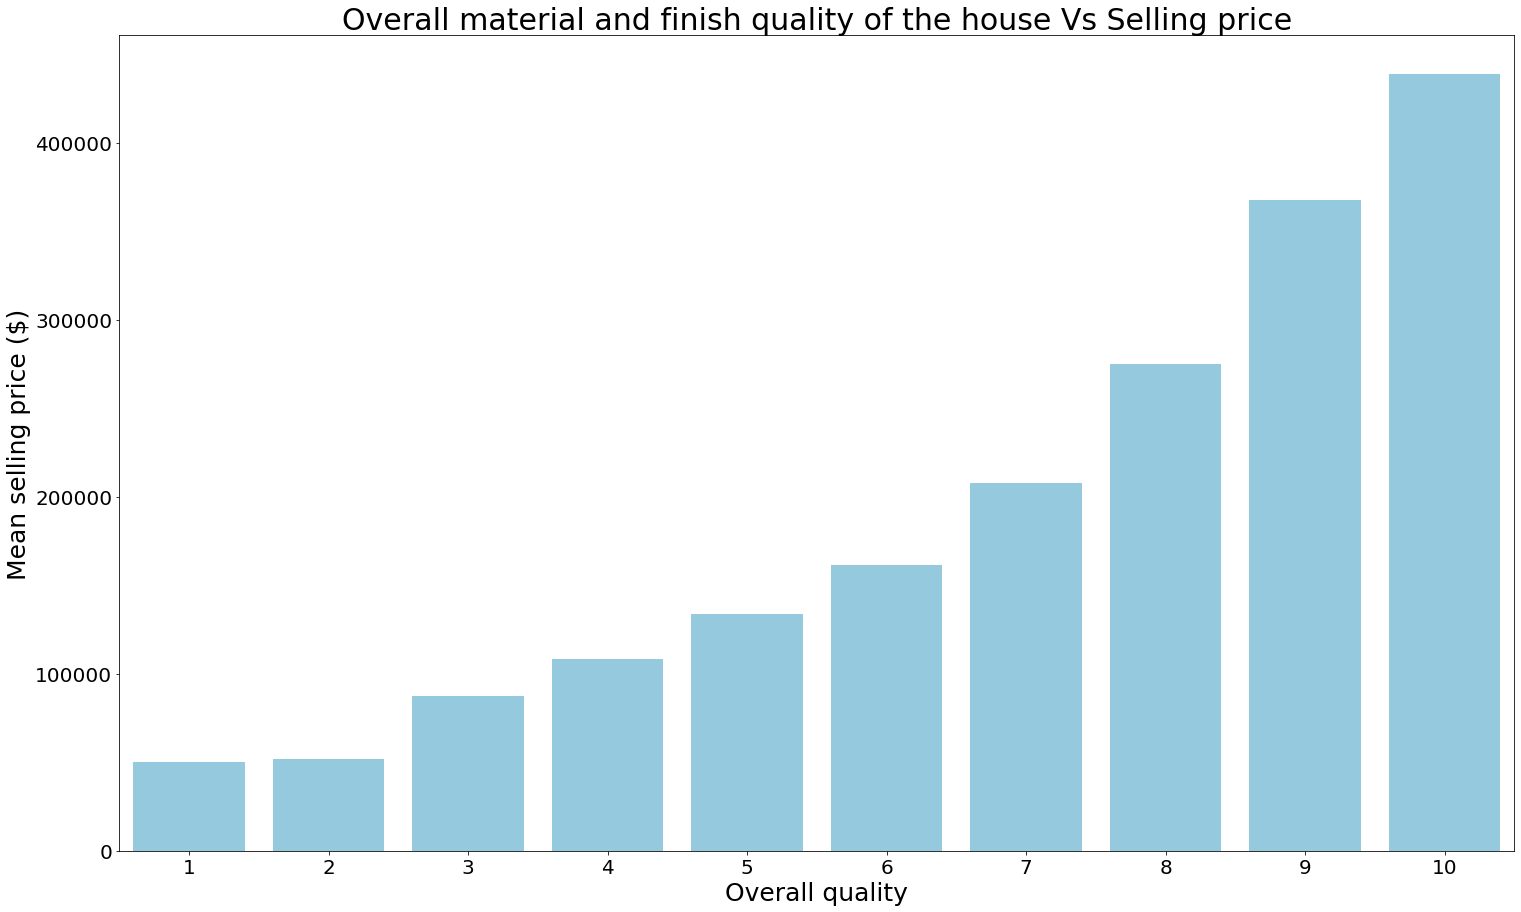

In [44]:
OverallQual_price = df.groupby('OverallQual').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=OverallQual_price['OverallQual'], y=OverallQual_price['Price'], color='skyblue')
plt.title("Overall material and finish quality of the house Vs Selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Overall quality", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

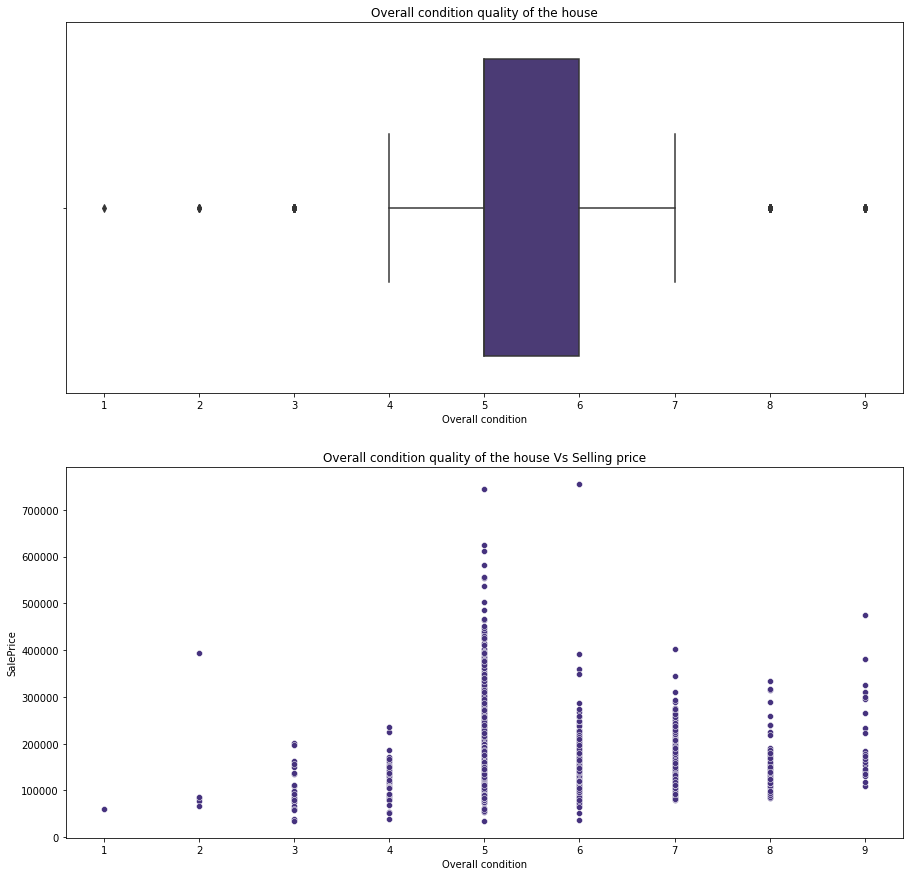

In [45]:
# Overall condition quality of the house
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
sns.boxplot(x=df['OverallCond'], ax=axs[0])
axs[0].set(title = 'Overall condition quality of the house', xlabel='Overall condition')
sns.scatterplot(x=df['OverallCond'], y=df['SalePrice'], ax=axs[1])
axs[1].set(title = 'Overall condition quality of the house Vs Selling price', xlabel='Overall condition')
plt.show()

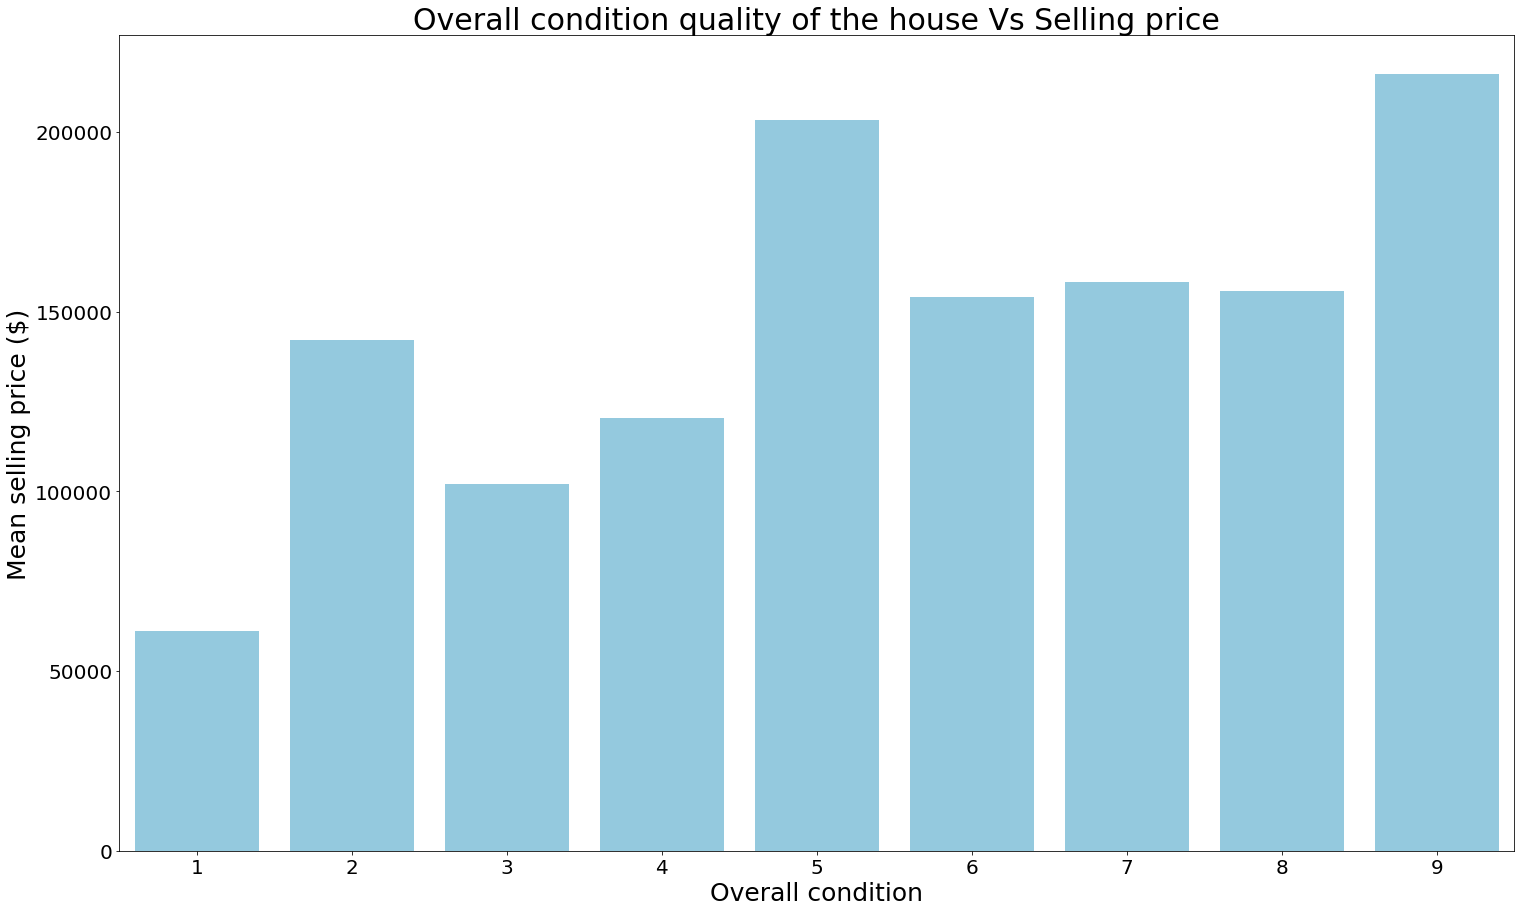

In [46]:
OverallCond_price = df.groupby('OverallCond').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=OverallCond_price['OverallCond'], y=OverallCond_price['Price'], color='skyblue')
plt.title("Overall condition quality of the house Vs Selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Overall condition", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Material queality seems to have a greater direct correlation with the selling price than condition quality of the house.

### Size of property, qty of bedroms and bathrooms

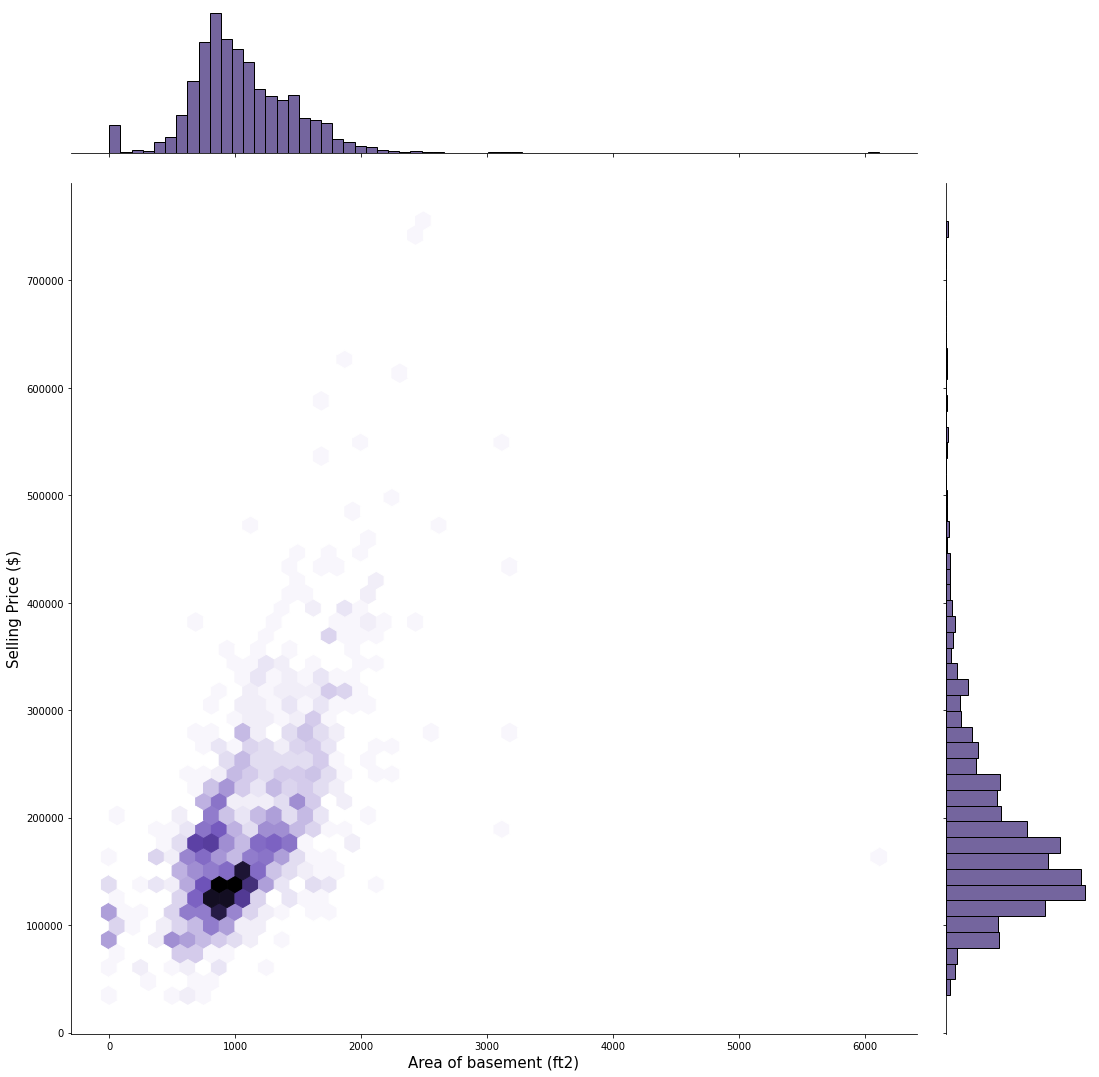

In [47]:
# Lets Check on the area of basement
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], kind = 'hex', height = 15)
plt.xlabel('Area of basement (ft2)', fontsize = 15)
plt.ylabel('Selling Price ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

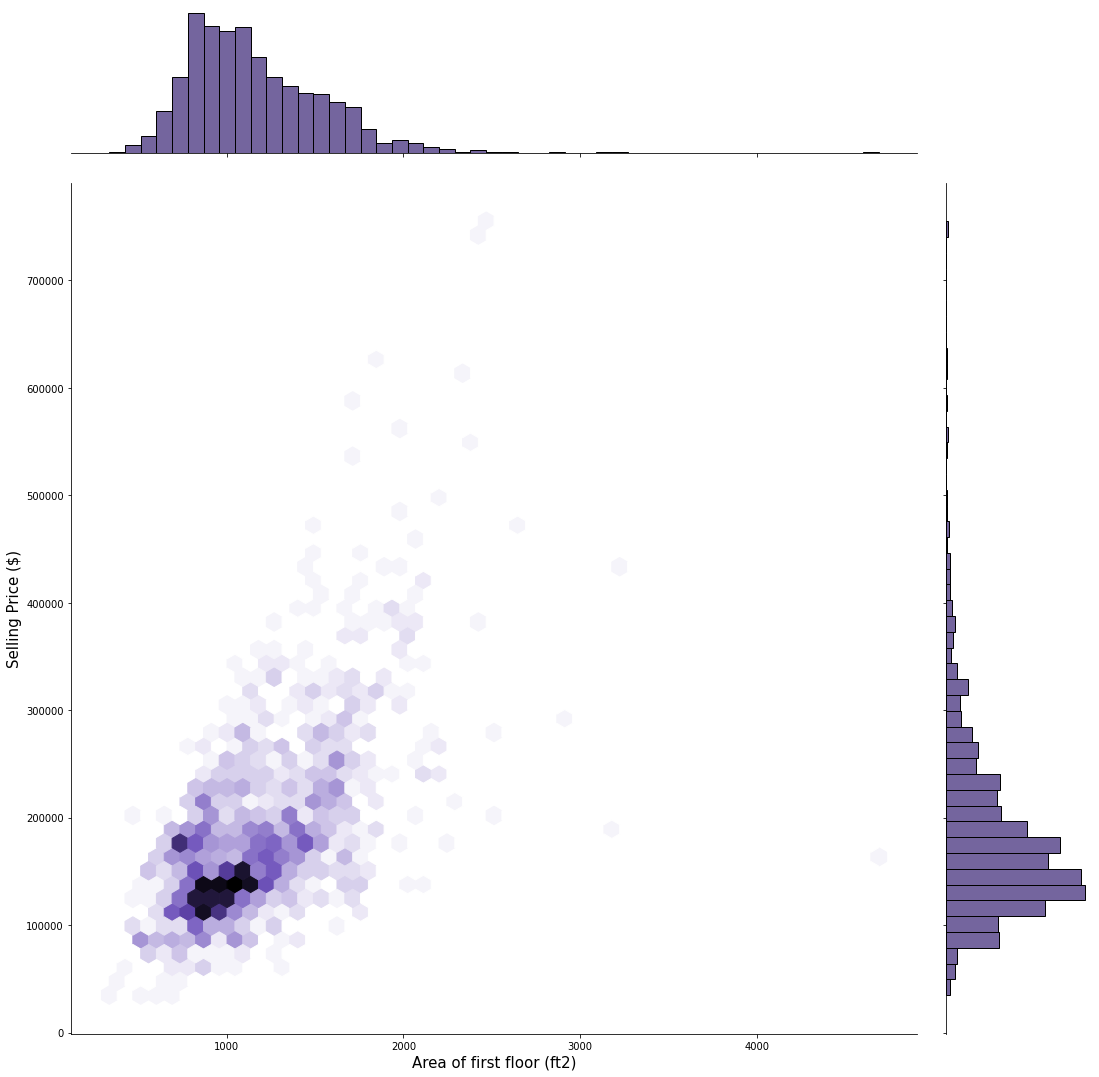

In [48]:
# First floor!
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], kind = 'hex', height = 15)
plt.xlabel('Area of first floor (ft2)', fontsize = 15)
plt.ylabel('Selling Price ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

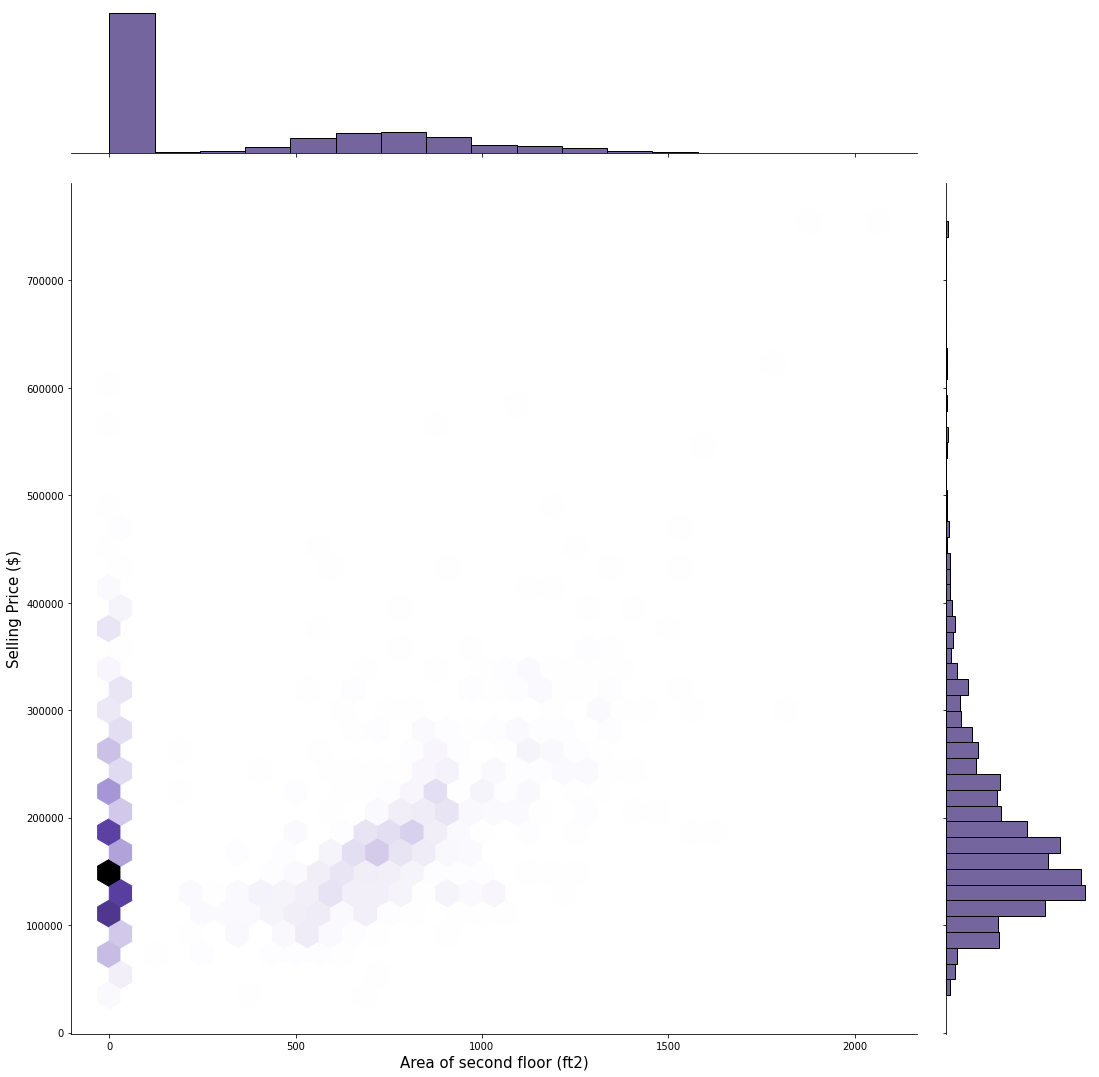

In [49]:
# And second floor!
sns.jointplot(x=df['2ndFlrSF'], y=df['SalePrice'], kind = 'hex', height = 15)
plt.xlabel('Area of second floor (ft2)', fontsize = 15)
plt.ylabel('Selling Price ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

This last graph showed us that most of the properties doesnt have a second floor.

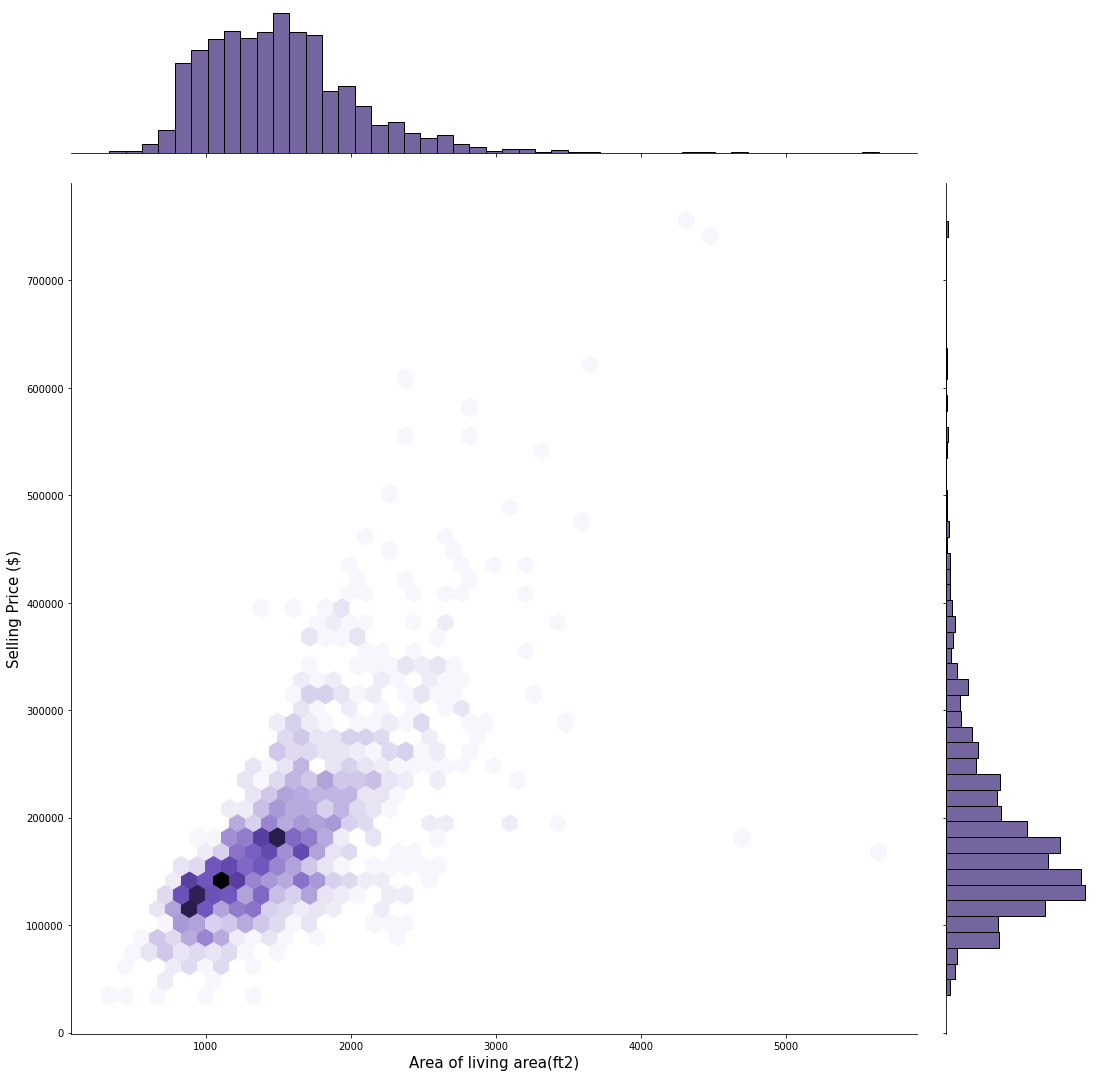

In [50]:
# Above grade (ground) living area square feet
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind = 'hex', height = 15)
plt.xlabel('Area of living area(ft2)', fontsize = 15)
plt.ylabel('Selling Price ($)', fontsize = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

Seems consistent that the greater the area of the construction, the greater the price of selling. 

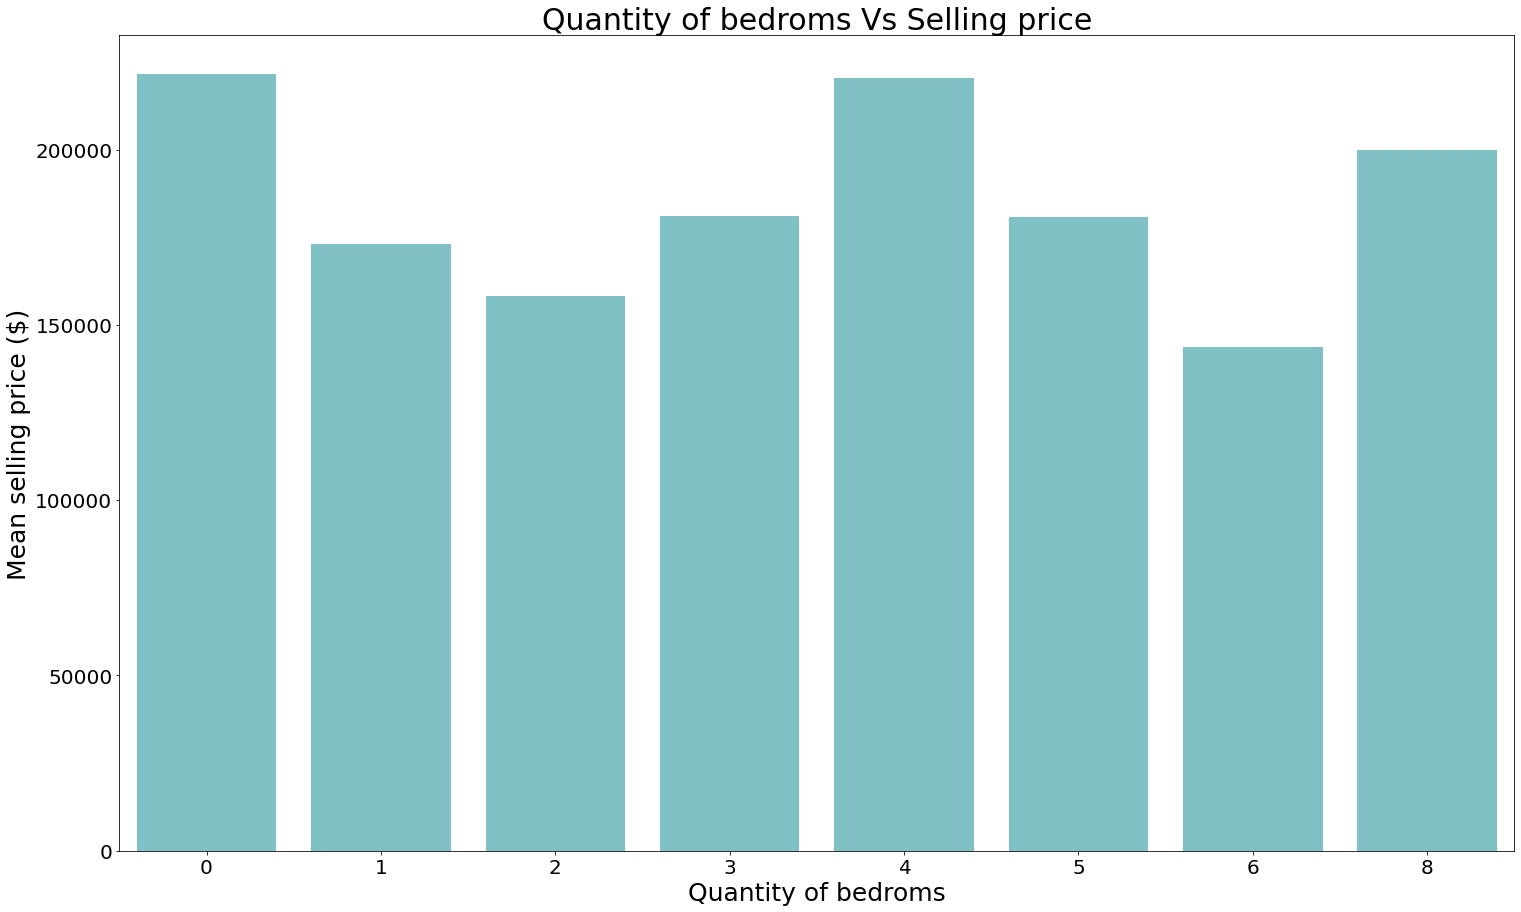

In [51]:
# Let's se the relationship between quantity of bedroms and selling price
Bedroom_price = df.groupby('BedroomAbvGr').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=Bedroom_price['BedroomAbvGr'], y=Bedroom_price['Price'], color='#74CBD1')
plt.title("Quantity of bedroms Vs Selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Quantity of bedroms", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

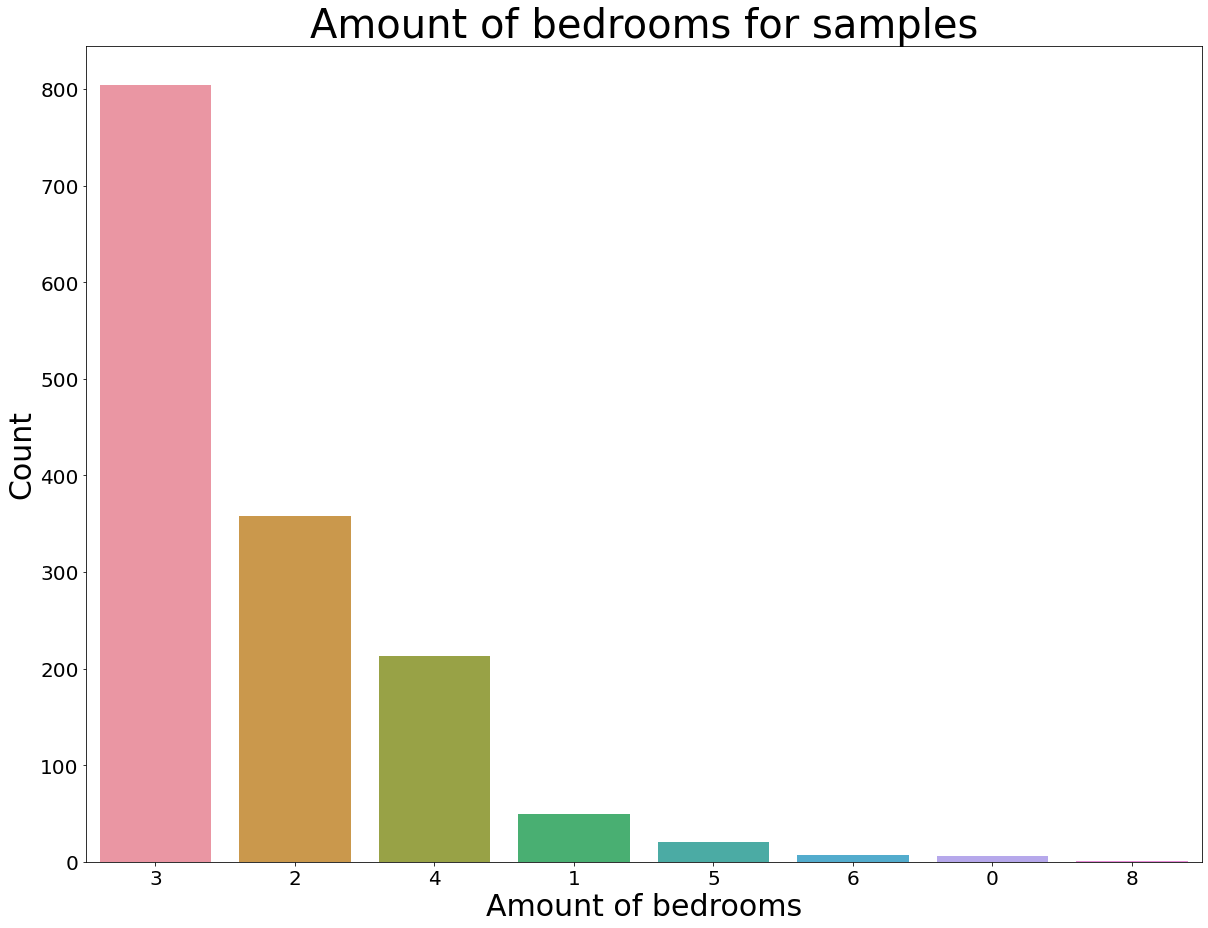

In [52]:
# Amount of bedrooms count
plt.figure(figsize=(20, 15))
count_bedroom = sns.countplot(df['BedroomAbvGr'], order = df['BedroomAbvGr'].value_counts().index)
plt.title('Amount of bedrooms for samples' , fontsize = 40, fontweight = 20)
plt.xlabel('Amount of bedrooms', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Most of the properties have between 2 and 4 bedrooms. As we can see, the categories of 6, 0 and 8 anr almost negligible, and since there are so few cases of theses we get that the mean for a 0 bedroom property is so high. Lets check on these cases a little bit closer

In [53]:
no_bedrooms = df.loc[(df['BedroomAbvGr'] == 0)]
no_bedrooms

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NA,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,4,3,CBlock,5,3,Gd,GLQ,1810,Unf,0,32,1842,GasA,4,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,4,5,Typ,1,4,Attchd,1981.0,Fin,3,894,3,3,Y,857,72,0,0,0,0,0,NA,NA,0,11,2006,WD,Normal,385000
189,190,120,RL,41.0,4923,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,3,PConc,5,3,Av,GLQ,1153,Unf,0,440,1593,GasA,5,Y,SBrkr,1593,0,0,1593,1,0,1,1,0,1,5,5,Typ,1,4,Attchd,2001.0,Fin,2,682,3,3,Y,0,120,0,0,224,0,0,NA,NA,0,8,2008,WD,Normal,286000
634,635,90,RL,64.0,6979,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3,3,No,GLQ,1056,Unf,0,0,1056,GasA,4,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,3,4,Typ,0,0,Detchd,1980.0,Unf,2,576,3,3,Y,264,56,0,0,0,0,0,GdPrv,Shed,600,6,2010,WD,Normal,144000
1163,1164,90,RL,60.0,12900,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,Av,GLQ,1198,Unf,0,0,1198,GasA,3,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,3,6,Typ,0,0,CarPort,1969.0,Unf,2,400,2,3,Y,120,0,0,0,0,0,0,NA,NA,0,1,2008,WD,Alloca,108959
1213,1214,80,RL,69.0,10246,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,4,Av,GLQ,648,Unf,0,0,648,GasA,5,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,3,3,Typ,0,0,Attchd,1965.0,Unf,1,364,3,3,Y,88,0,0,0,0,0,0,NA,NA,0,5,2006,WD,Normal,145000
1270,1271,40,RL,69.0,23595,Pave,NA,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,4,3,PConc,4,3,Gd,GLQ,1258,Unf,0,74,1332,GasA,3,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,4,4,Typ,1,3,Attchd,1979.0,Fin,2,586,3,3,Y,268,0,0,0,0,0,0,NA,NA,0,4,2010,WD,Normal,260000


In [54]:
eight_bedrooms = df.loc[(df['BedroomAbvGr'] == 8)]
eight_bedrooms

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,2,No,LwQ,256,Unf,0,1184,1440,GasA,5,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,2,14,Typ,0,0,Attchd,1914.0,Unf,0,0,3,3,N,0,110,0,0,0,0,0,NA,NA,0,3,2007,WD,Abnorml,200000


In [55]:
six_bedrooms = df.loc[(df['BedroomAbvGr'] == 6)]
six_bedrooms

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
144,145,90,RM,70.0,9100,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,BrkFace,336.0,3,3,CBlock,3,3,No,Rec,1332,Unf,0,396,1728,GasA,3,Y,SBrkr,1728,0,0,1728,1,0,2,0,6,2,3,10,Typ,0,0,Detchd,1963.0,Unf,2,504,3,3,Y,0,0,0,0,0,0,0,NA,NA,0,11,2006,ConLI,Abnorml,125000
291,292,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,2Story,5,6,1912,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,3,2,No,Rec,210,Unf,0,570,780,GasA,5,N,SBrkr,936,780,0,1716,1,0,2,0,6,1,2,9,Typ,0,0,Attchd,1912.0,Unf,0,0,3,3,N,0,184,0,0,0,0,0,NA,NA,0,3,2008,WD,Normal,135900
330,331,90,RL,69.0,10624,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,4,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkFace,84.0,3,3,CBlock,3,3,No,GLQ,40,Rec,264,1424,1728,GasA,3,Y,SBrkr,1728,0,0,1728,0,1,2,0,6,2,3,10,Typ,0,0,Detchd,2002.0,Unf,1,352,3,3,Y,155,0,0,0,0,0,0,NA,NA,0,11,2007,WD,Normal,119000
570,571,90,RL,74.0,13101,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1965,1965,Gable,CompShg,HdBoard,HdBoard,BrkFace,108.0,3,3,CBlock,3,3,No,LwQ,231,Unf,0,1497,1728,GasA,3,Y,SBrkr,1728,0,0,1728,0,0,2,0,6,2,3,10,Typ,0,0,Detchd,1987.0,Unf,2,576,3,3,Y,0,0,0,0,0,0,0,NA,NA,0,11,2008,WD,Normal,142600
843,844,90,RL,80.0,8000,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,Duplex,1Story,5,4,1961,1961,Gable,CompShg,BrkFace,BrkFace,None,0.0,3,3,CBlock,3,3,No,Unf,0,Unf,0,1800,1800,GasA,5,N,SBrkr,1800,0,0,1800,0,0,2,0,6,2,3,10,Typ,0,0,Attchd,1961.0,Unf,0,0,3,3,Y,0,0,0,0,0,0,0,NA,NA,0,7,2007,WD,Normal,141000
897,898,90,RL,64.0,7018,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,Slab,3,3,No,Unf,0,Unf,0,0,0,GasA,3,Y,SBrkr,1120,1120,0,2240,0,0,2,0,6,2,3,12,Typ,0,0,Detchd,1979.0,Unf,2,528,3,3,Y,154,0,0,0,0,0,0,NA,NA,0,6,2009,WD,Alloca,142953
1350,1351,90,RL,91.0,11643,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,3,3,CBlock,3,3,No,LwQ,500,Unf,0,748,1248,GasA,3,Y,SBrkr,1338,1296,0,2634,1,1,2,2,6,2,3,12,Typ,0,0,Detchd,1969.0,Unf,4,968,3,3,Y,0,0,0,0,0,0,0,NA,NA,0,8,2009,WD,Normal,200000


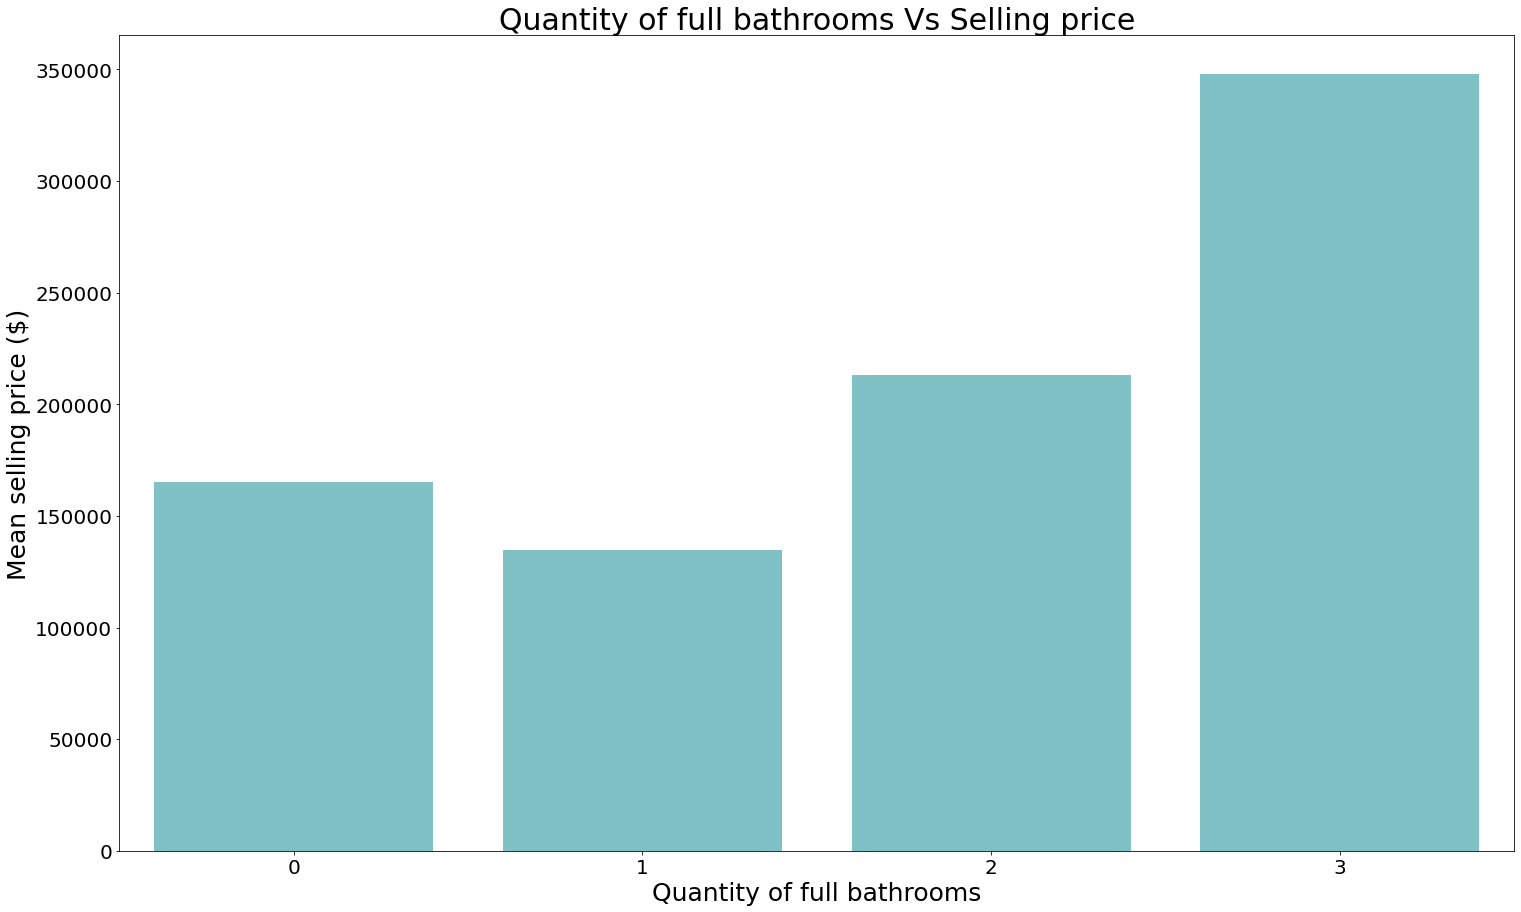

In [56]:
# Let's se the relationship between quantity of bathrooms and selling price
FullBath_price = df.groupby('FullBath').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=FullBath_price['FullBath'], y=FullBath_price['Price'], color='#74CBD1')
plt.title("Quantity of full bathrooms Vs Selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Quantity of full bathrooms", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

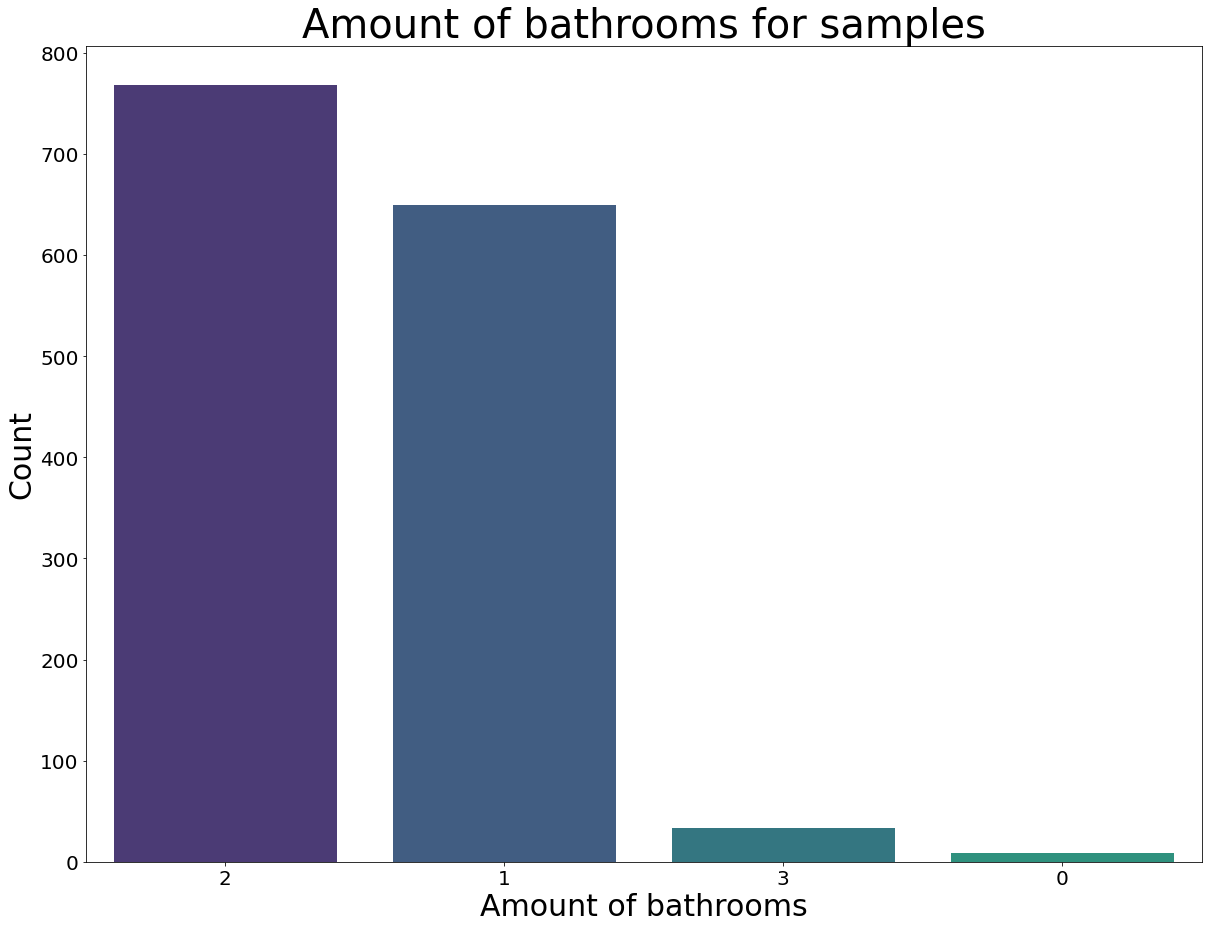

In [57]:
# Amount of bathrooms count
plt.figure(figsize=(20, 15))
count_bedroom = sns.countplot(df['FullBath'], order = df['FullBath'].value_counts().index)
plt.title('Amount of bathrooms for samples' , fontsize = 40, fontweight = 20)
plt.xlabel('Amount of bathrooms', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Lets take a closer look to the cases with zero bathrooms

In [58]:
no_bathrooms = df.loc[(df['FullBath'] == 0)]
no_bathrooms

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NA,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,4,3,CBlock,5,3,Gd,GLQ,1810,Unf,0,32,1842,GasA,4,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,4,5,Typ,1,4,Attchd,1981.0,Fin,3,894,3,3,Y,857,72,0,0,0,0,0,NA,NA,0,11,2006,WD,Normal,385000
188,189,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,3,3,CBlock,4,3,Av,GLQ,1086,Unf,0,0,1086,GasA,3,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,3,6,Typ,2,3,Detchd,1979.0,Unf,2,528,3,3,Y,120,0,0,0,0,0,0,NA,NA,0,6,2009,WD,Alloca,153337
375,376,30,RL,69.0,10020,Pave,NA,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,BrkTil,2,1,Gd,BLQ,350,Unf,0,333,683,GasA,4,N,FuseA,904,0,0,904,1,0,0,1,1,1,2,4,Maj1,0,0,Attchd,1922.0,Unf,0,0,3,3,Y,0,0,0,0,0,0,0,NA,NA,0,3,2009,WD,Normal,61000
597,598,120,RL,53.0,3922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,4,3,PConc,5,3,Av,Unf,0,Unf,0,1258,1258,GasA,5,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,4,7,Typ,1,4,Attchd,2006.0,Fin,3,648,3,3,Y,120,16,0,0,0,0,0,NA,NA,0,2,2007,New,Partial,194201
634,635,90,RL,64.0,6979,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3,3,No,GLQ,1056,Unf,0,0,1056,GasA,4,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,3,4,Typ,0,0,Detchd,1980.0,Unf,2,576,3,3,Y,264,56,0,0,0,0,0,GdPrv,Shed,600,6,2010,WD,Normal,144000
916,917,20,C (all),50.0,9000,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,CBlock,3,3,Av,BLQ,50,Unf,0,430,480,GasA,3,N,FuseA,480,0,0,480,1,0,0,0,1,1,3,4,Typ,0,0,Detchd,1958.0,Unf,1,308,3,3,Y,0,0,0,0,0,0,0,NA,NA,0,10,2006,WD,Abnorml,35311
1163,1164,90,RL,60.0,12900,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,Av,GLQ,1198,Unf,0,0,1198,GasA,3,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,3,6,Typ,0,0,CarPort,1969.0,Unf,2,400,2,3,Y,120,0,0,0,0,0,0,NA,NA,0,1,2008,WD,Alloca,108959
1213,1214,80,RL,69.0,10246,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,4,Av,GLQ,648,Unf,0,0,648,GasA,5,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,3,3,Typ,0,0,Attchd,1965.0,Unf,1,364,3,3,Y,88,0,0,0,0,0,0,NA,NA,0,5,2006,WD,Normal,145000
1270,1271,40,RL,69.0,23595,Pave,NA,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,4,3,PConc,4,3,Gd,GLQ,1258,Unf,0,74,1332,GasA,3,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,4,4,Typ,1,3,Attchd,1979.0,Fin,2,586,3,3,Y,268,0,0,0,0,0,0,NA,NA,0,4,2010,WD,Normal,260000


### Utilities, heating, air conditioning and electrical system

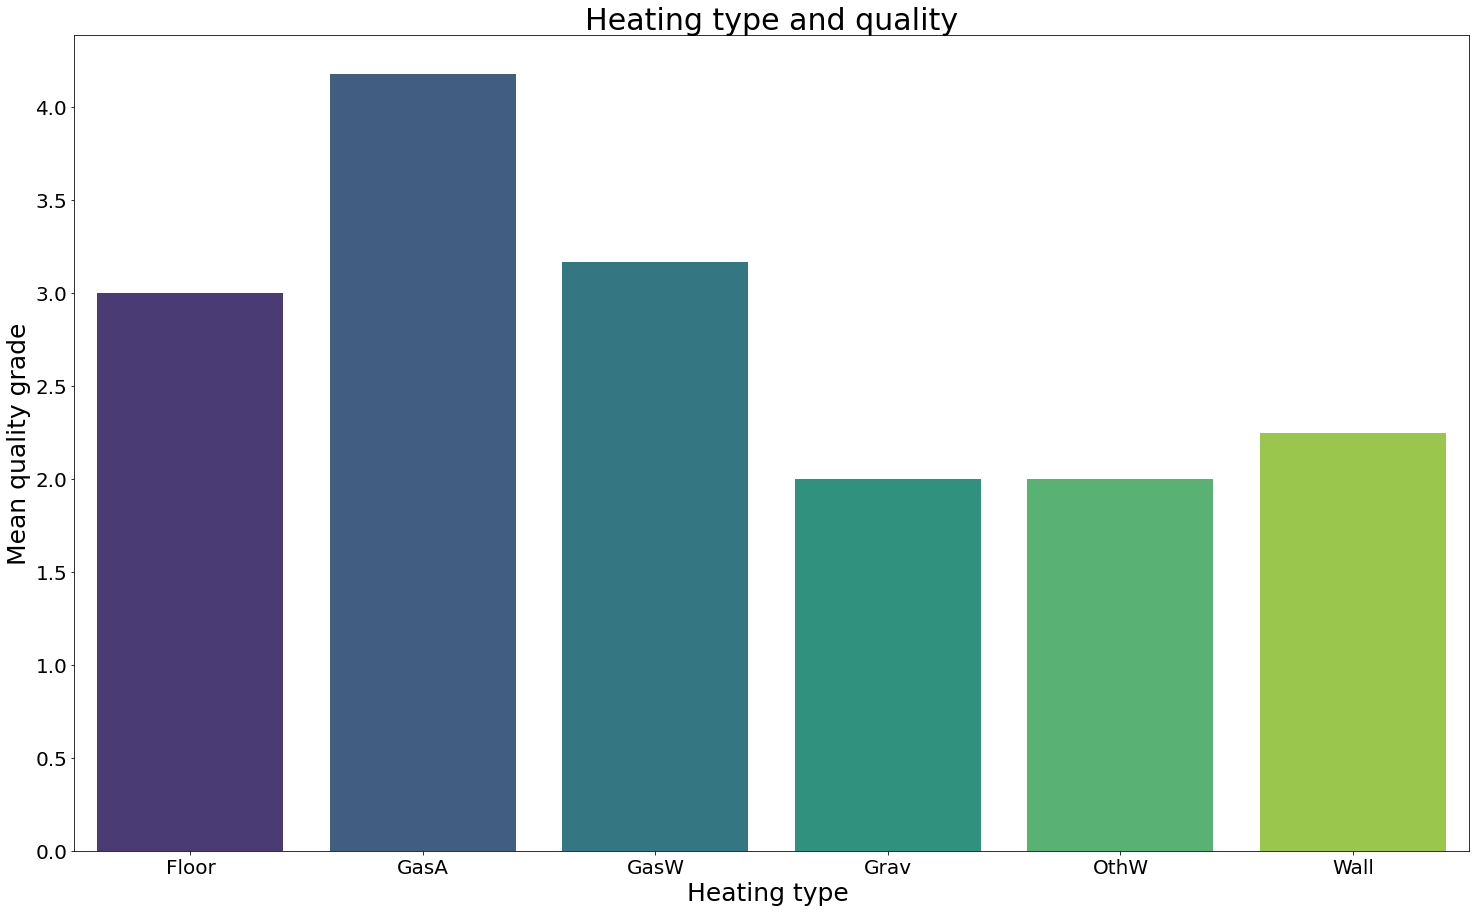

In [59]:
# Type of heating Vs. heating quality and condition
heating_quality = df.groupby('Heating').HeatingQC.mean().to_frame(name='Quality').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=heating_quality['Heating'], y=heating_quality['Quality'])
plt.title("Heating type and quality", fontsize = 30, fontweight = 20)
plt.xlabel("Heating type ", fontsize = 25)
plt.ylabel('Mean quality grade', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

According to quality evaluation, Gas powered heating seems more reliable

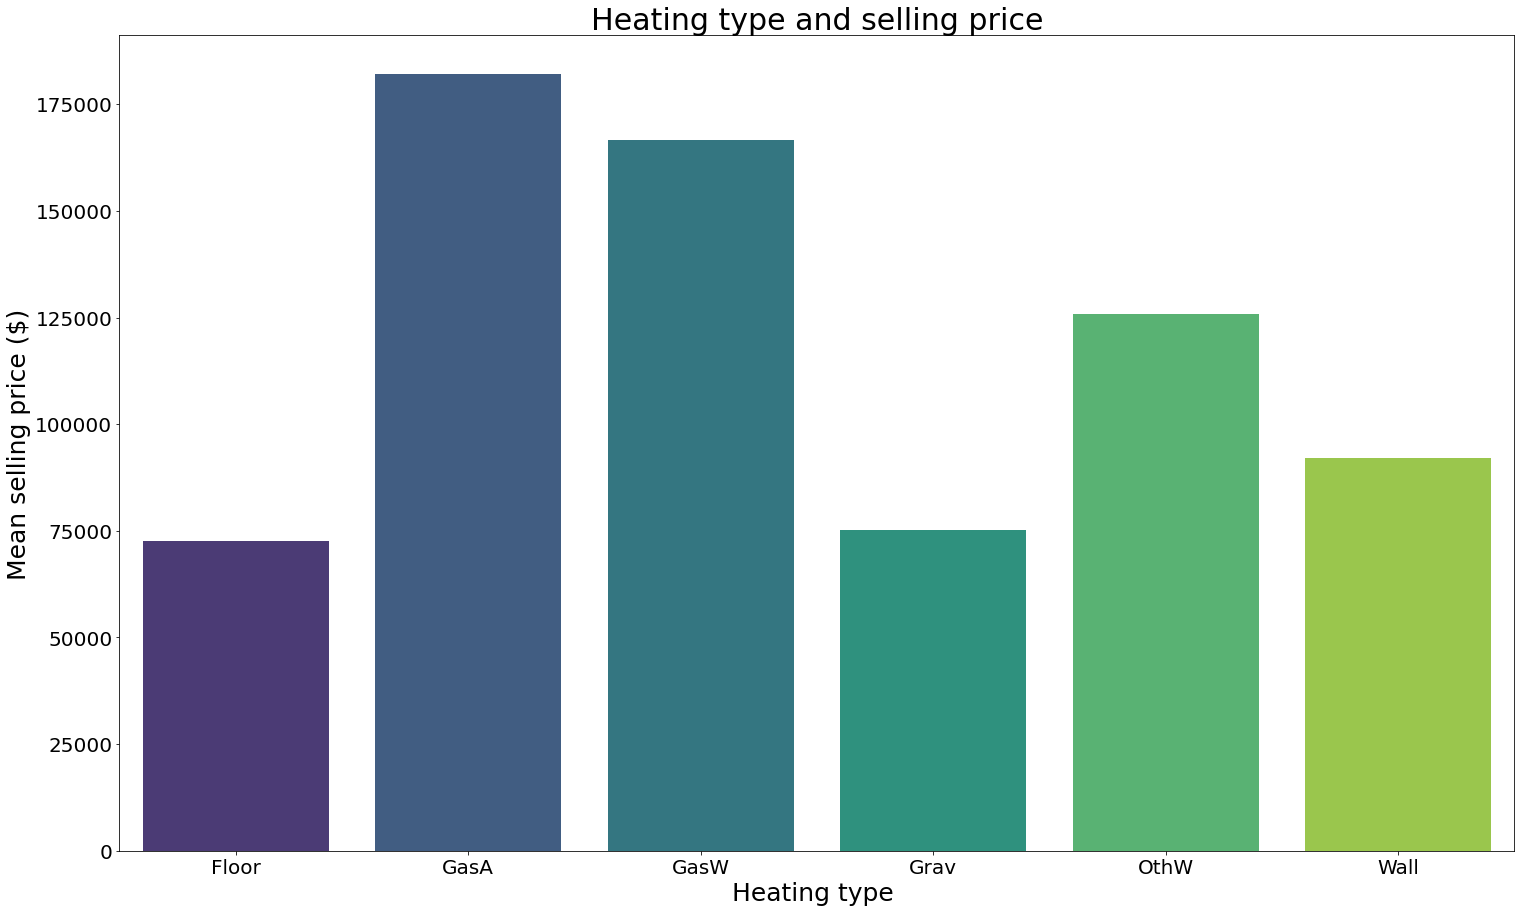

In [60]:
# Type of heating Vs. selling price
heating_price = df.groupby('Heating').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=heating_price['Heating'], y=heating_price['Price'])
plt.title("Heating type and selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Heating type ", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

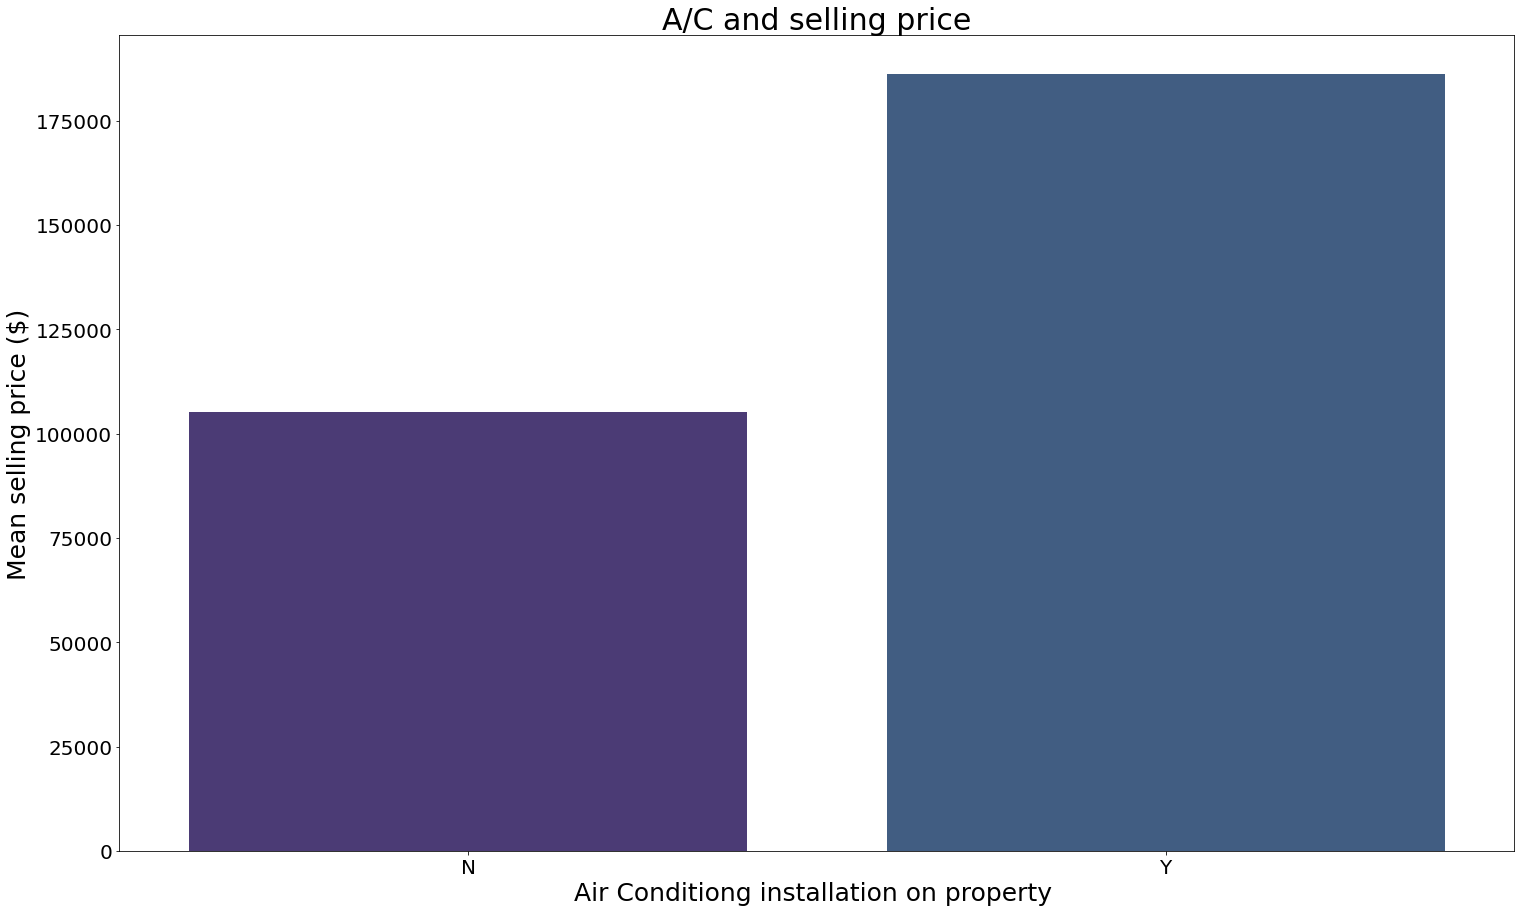

In [61]:
# Central air and price
ac_price = df.groupby('CentralAir').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=ac_price['CentralAir'], y=ac_price['Price'])
plt.title("A/C and selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Air Conditiong installation on property ", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

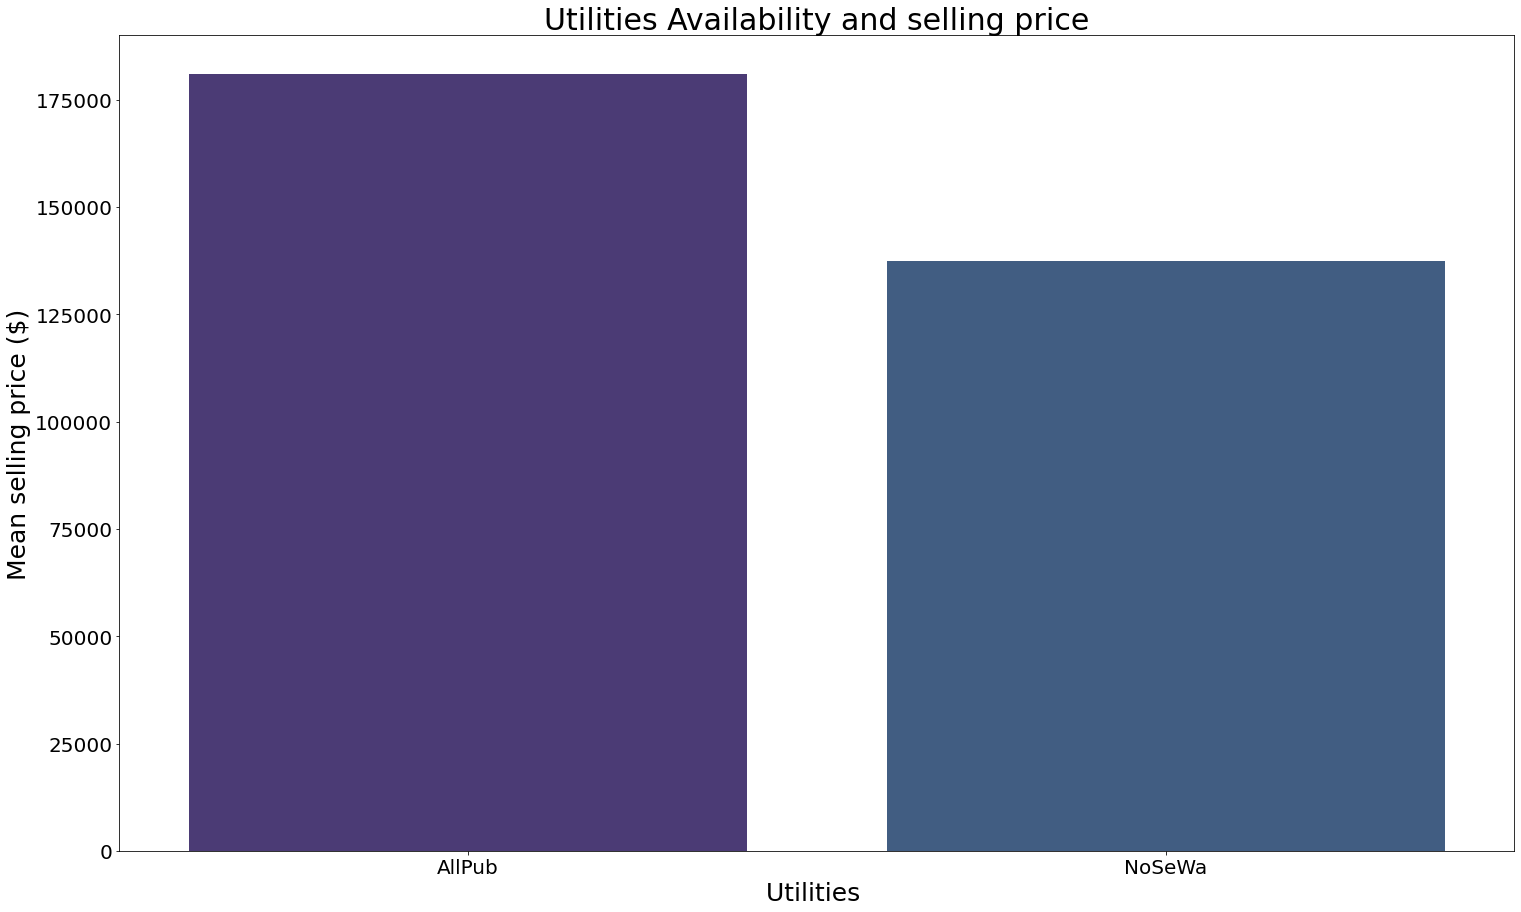

In [62]:
# Utilities
utilities_price = df.groupby('Utilities').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=utilities_price['Utilities'], y=utilities_price['Price'])
plt.title("Utilities Availability and selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Utilities ", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

### Selling Conditions

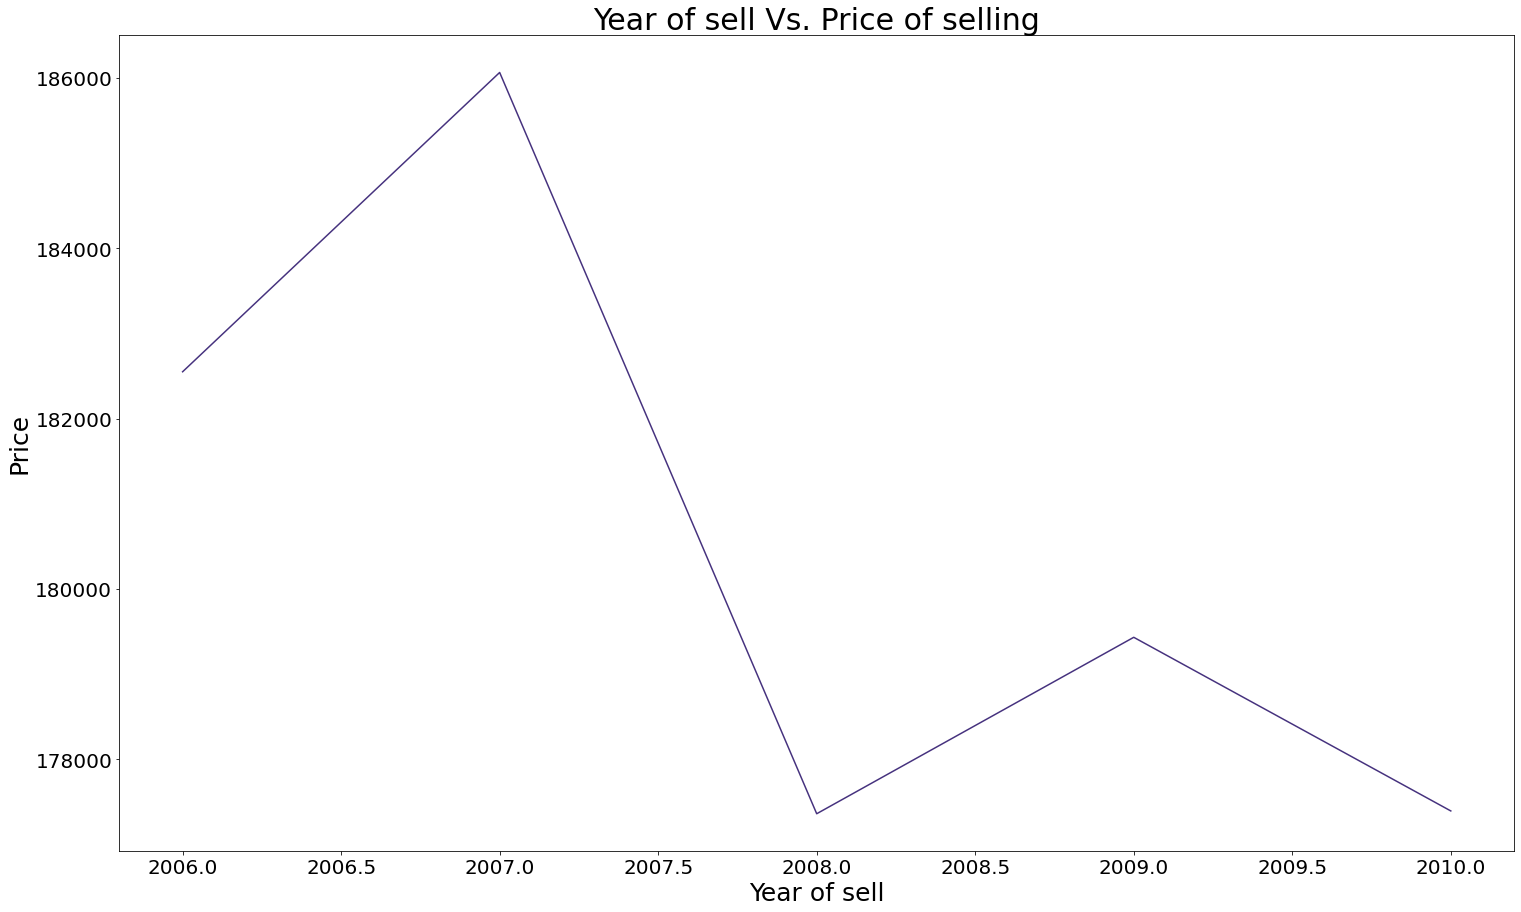

In [63]:
YrSold_price = df.groupby('YrSold').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.lineplot(x=YrSold_price['YrSold'], y=YrSold_price['Price'])
plt.title("Year of sell Vs. Price of selling", fontsize = 30, fontweight = 20)
plt.xlabel("Year of sell", fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

We see a significant descend on the selling price starting around 2007

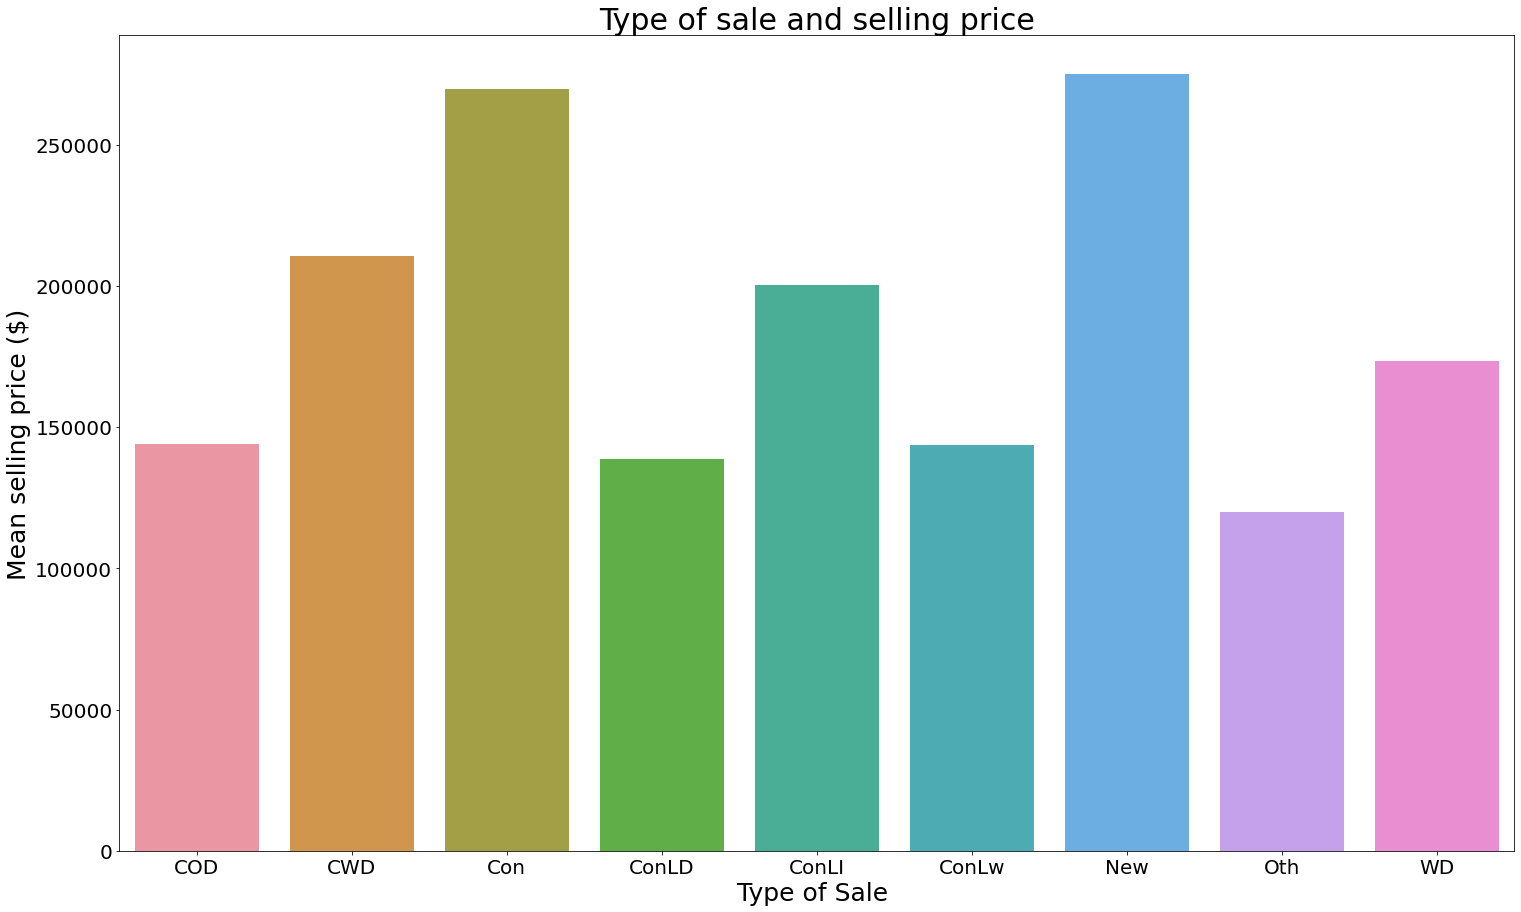

In [64]:
# Type of Sale
SaleType_price = df.groupby('SaleType').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=SaleType_price['SaleType'], y=SaleType_price['Price'])
plt.title("Type of sale and selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Type of Sale ", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

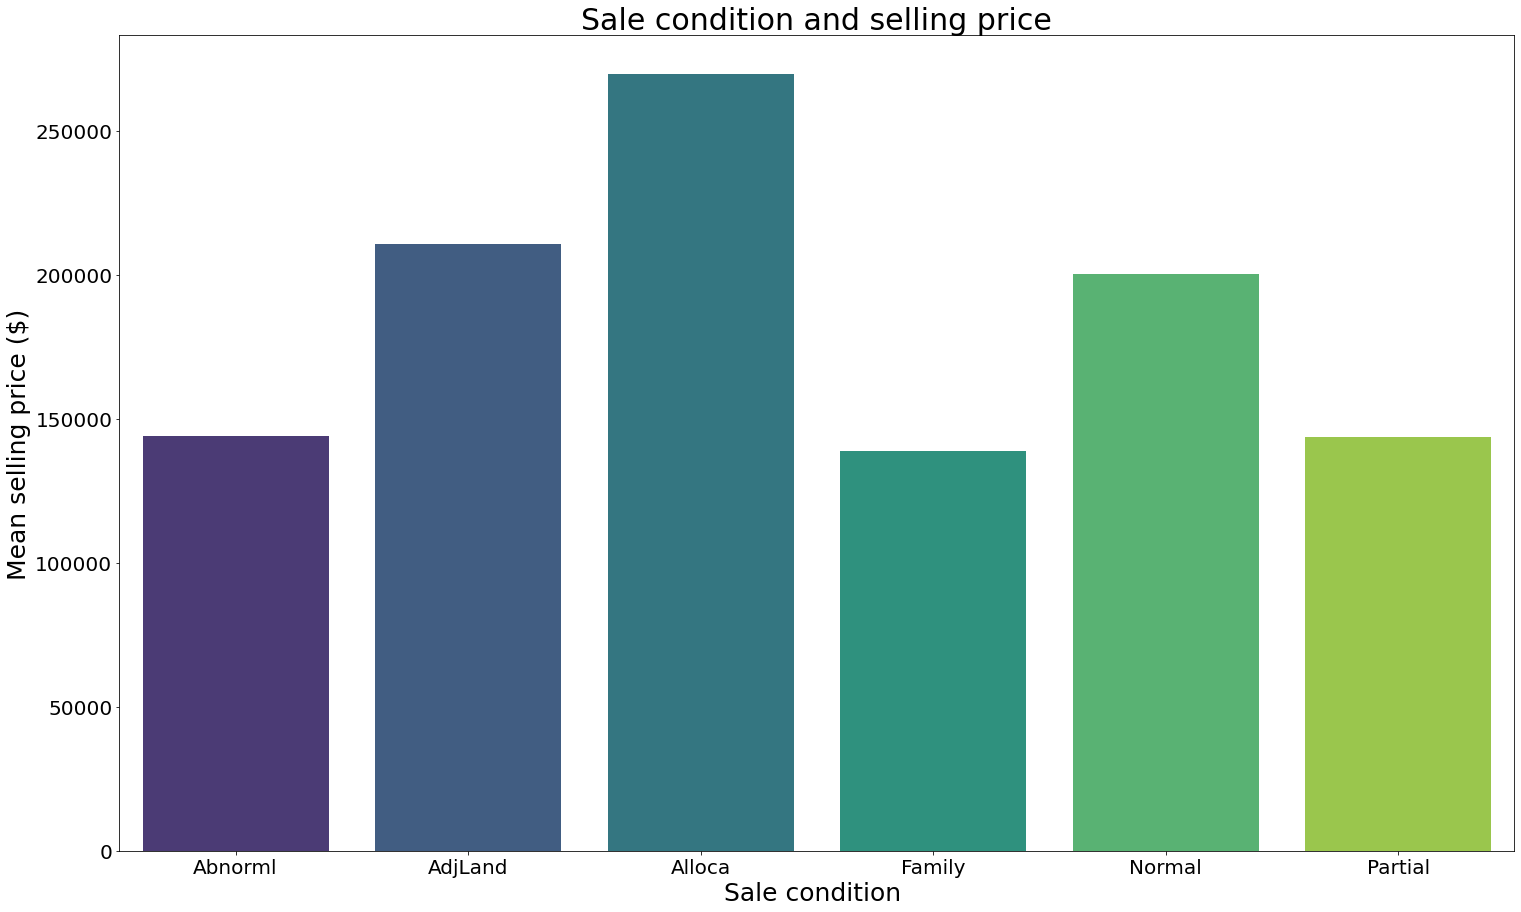

In [65]:
# Sale condition
SaleCondition_price = df.groupby('SaleCondition').SalePrice.mean().to_frame(name='Price').reset_index()
plt.figure(figsize=(25, 15))
sns.barplot(x=SaleCondition_price['SaleCondition'], y=SaleType_price['Price'])
plt.title("Sale condition and selling price", fontsize = 30, fontweight = 20)
plt.xlabel("Sale condition ", fontsize = 25)
plt.ylabel('Mean selling price ($)', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

## Prediction models

In [66]:
# Dummy data frame
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,2003.0,2,548,3,3,0,61,0,0,0,0,0,0,2,2008,208500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,

In [67]:
df1.shape

(1460, 226)

In [68]:
# Let's define the variables
X = df1.drop(['SalePrice', 'Id'], axis=1)
y = df1.SalePrice

In [69]:
# We will divide the training and testing set in a 70-30 ratio
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [70]:
# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Lineal Regression

In [71]:
# Importing the library
from sklearn.linear_model import LinearRegression

In [72]:
ln = LinearRegression(fit_intercept = True, normalize = False)
ln.fit(X_train, y_train)

LinearRegression(normalize=False)

In [73]:
y_pred = ln.predict(X_test)

In [74]:
# Metrics
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y_test, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y_test, y_pred))
print('')
print('R2')
print(r2_score(y_test, y_pred))
print('')

Mean Squared Error
2226098093.507103

Root Mean Squared Error
47181.54399240346

Mean Absolute Error
20377.103999981337

R2
0.6822269971424415



### Hyperparameters and cross-validation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [76]:
ln = LinearRegression()
cv = StratifiedKFold(n_splits=12)
y_pred = cross_val_predict(ln, X, y, cv=cv)

In [77]:
# Metrics
print('Mean Squared Error')
print(mean_squared_error(y, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y, y_pred))
print('')
print('R2')
print(r2_score(y, y_pred))
print('')

Mean Squared Error
2078036130.5260541

Root Mean Squared Error
45585.481576112084

Mean Absolute Error
20160.45359446593

R2
0.6705080402800654



## Random Forest Regressor

In [78]:
# Importing the library
from sklearn.ensemble import RandomForestRegressor

In [79]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
# Predictions
y_pred = rfr.predict(X_test)

In [81]:
# Metrics
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y_test, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y_test, y_pred))
print('')
print('R2')
print(r2_score(y_test, y_pred))
print('')

Mean Squared Error
744261858.379258

Root Mean Squared Error
27281.16306866806

Mean Absolute Error
17012.7018630137

R2
0.8937574555499842



### Hyperparameters and cross-validation

In [82]:
# Parameters currently in use
pprint(rfr.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [83]:
# Hyperparameters to evaluate
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 9)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_features.append(None)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [84]:
# Model creation
rfr_hyper = RandomForestRegressor()
cv = StratifiedKFold(n_splits=5)
rfr_random = RandomizedSearchCV(estimator = rfr_hyper, param_distributions = random_grid, n_iter = 100, cv = cv,
                                verbose=2, random_state=42, n_jobs = -1)
rfr_random.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [85]:
# Best params
rfr_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [86]:
# Predictions
y_pred = rfr_random.predict(X)

In [87]:
# Metrics
print('Mean Squared Error')
print(mean_squared_error(y, y_pred))
print('')
print('Root Mean Squared Error')
print(mean_squared_error(y, y_pred, squared = False))
print('')
print('Mean Absolute Error')
print(mean_absolute_error(y, y_pred))
print('')
print('R2')
print(r2_score(y, y_pred))
print('')

Mean Squared Error
50.37290715372879

Root Mean Squared Error
7.097387347026284

Mean Absolute Error
1.280821917808279

R2
0.999999992012907



In [88]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [89]:
# Original model
evaluate(rfr, X_test, y_test)

Model Performance
Average Error: 17012.7019 degrees.
Accuracy = 89.78%.


In [90]:
# Hypertuned model
evaluate(rfr_random, X, y)

Model Performance
Average Error: 1.2808 degrees.
Accuracy = 100.00%.


# Test data treatment

In [91]:
test = pd.read_csv('test.csv')
pd.options.display.max_columns = None
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Null data treatment

In [93]:
# Categorical
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0]) 
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0]) 
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0]) 
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0]) 
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0]) 
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0]) 
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0]) 
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

test['Alley'] = test['Alley'].fillna("NA")
test['FireplaceQu'] = test['FireplaceQu'].fillna("NA")
test['PoolQC'] = test['PoolQC'].fillna("NA")
test['Fence'] = test['Fence'].fillna("NA")
test['MiscFeature'] = test['MiscFeature'].fillna("NA")

In [94]:
# Numerical
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['YearBuilt'])
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].median())

test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])

In [95]:
# Let's replace!
test.ExterQual = test.ExterQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.ExterCond = test.ExterCond.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.BsmtQual = test.BsmtQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.BsmtCond = test.BsmtCond.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.HeatingQC = test.HeatingQC.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.KitchenQual = test.KitchenQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.FireplaceQu = test.FireplaceQu.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.GarageQual = test.GarageQual.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.GarageCond = test.GarageCond.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])
test.PoolQC = test.PoolQC.replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0, 1, 2, 3, 4, 5])

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,3,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,Typ,0,0,Attchd,1961.0,Unf,1.0,730.0,3,3,Y,140,0,0,0,120,0,0,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,3,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,Typ,0,0,Attchd,1958.0,Unf,1.0,312.0,3,3,Y,393,36,0,0,0,0,0,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,4,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,Typ,1,3,Attchd,1997.0,Fin,2.0,482.0,3,3,Y,212,34,0,0,0,0,0,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,5,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,4,7,Typ,1,4,Attchd,1998.0,Fin,2.0,470.0,3,3,Y,360,36,0,0,0,0,0,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,5,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,4,5,Typ,0,0,Attchd,1992.0,RFn,2.0,506.0,3,3,Y,0,82,0,0,144,0,0,NA,NA,0,1,2010,WD,Normal


In [96]:
# Lets check we dont have null values
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [97]:
# Lets create a dummy DataFrame for the test dataset
test1 = pd.get_dummies(test, drop_first=True)
test1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,3,3,3,3,468.0,144.0,270.0,882.0,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,0,0,1961.0,1.0,730.0,3,3,140,0,0,0,120,0,0,0,6,2010,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,3,3,3,3,923.0,0.0,406.0,1329.0,3,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,0,0,1958.0,1.0,312.0,3,3,393,36,0,0,0,0,0,12500,6,2010,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [98]:
test1.shape

(1459, 209)

As we can see, in the training  dummy DF we have 226 columns and in the testing we have 209. Even though we applied the same transformations, the difference on inputs manifested of the dummification of the dataframe. To get the predicted values we need the have the same amount of features

In [99]:
print(test.shape)
print(df.shape)

(1459, 80)
(1460, 81)


In [100]:
# Lets concat each data set
concat = pd.concat([df, test], axis = 0)
concat.shape

(2919, 81)

In [101]:
concat1 = pd.get_dummies(concat, drop_first=True)
concat1 = concat1.reset_index(drop=True)
concat1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,706.0,0.0,150.0,856.0,5,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,0,0,2003.0,2.0,548.0,3,3,0,61,0,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,

In [102]:
concat1.shape

(2919, 226)

In [103]:
# We will keep only the values from the testing dataset
testing = concat1.iloc[1460:]
testing = testing.reset_index(drop=True)
testing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,3,3,3,3,468.0,144.0,270.0,882.0,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,0,0,1961.0,1.0,730.0,3,3,140,0,0,0,120,0,0,0,6,2010,NaN,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0

In [104]:
testing.shape

(1459, 226)

## Prediction

In [105]:
X = testing.drop(['SalePrice', 'Id'], axis=1)

In [106]:
testing['Saleprice'] = rfr_random.predict(X)

In [107]:
testing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,3,3,3,3,468.0,144.0,270.0,882.0,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,0,0,1961.0,1.0,730.0,3,3,140,0,0,0,120,0,0,0,6,2010,NaN,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0

In [108]:
predictions = testing[['Id', 'Saleprice']]
predictions = predictions.set_index('Id')
predictions

,Saleprice
Id,
1461,127488.586667
1462,153467.083333
1463,182557.940000
1464,193200.690000
1465,190096.723333
1466,182963.396667
1467,172496.250000
1468,176688.520000
1469,177665.606667


In [109]:
# To csv
sample_submissions = predictions.to_csv('sample_submission.csv')